# Numerical Methods 1
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott), [Christian Jacobs](http://www.christianjacobs.uk)

# Lecture 1: Interpolation and curve fitting

## Learning objectives:

* Learn about standard methods to approximate discrete data points.
* Differences with curve fitting of noisy data.
* Implement methods to compute simple polynomial interpolation.

# Introduction

## Interpolation vs curve-fitting

Consider a discrete set of data points 

$$ (x_i, y_i),\quad i=0,\ldots,N,$$

and that we wish to approximate this data in some sense. The data may be known to be exact (if we wished to approximate a complex function by a simpler expression say), or it may have errors from measurement or observational techniques with known or unknown error bars.

### Interpolation
Interpolation assumes that these data points are exact (e.g. no measurement errors) and at distinct $x$ locations. It aims to fit a function (or curve), $y=f(x)$, to this data which exactly passes through the $N$ discrete points. This means that we have the additional constraint on the $x_s$'s that
$$x_0 < x_1 < \ldots < x_N,$$ 
and that 
$$y_i=f(x_i),\quad \forall i.$$

In this case the function $f$ is known as the *interpolating function*, or simply the *interpolant*.

### Curve-fitting
Alternatively, when we have data with noise, or multiple different measurement values ($y$) at a given $x$ then we cannot fit a function/curve that goes through all points exactly, and rather have to perform **curve-fitting** - finding a function that approximates the data in some sense by does not necessarily hit all points. In this case we no longer have the requirement that 
$$x_0 < x_1 < \ldots < x_N$$ 
and can consider the data simply as a *cloud of points*. This is the most typical case for real world data which contains variability and noise giving rise to multiple different measurements (i.e. $y$ values) at the same $x$ location.

An example of interpolation would be to simply fit a line between every successive two data points - this is a piecewise-linear (an example of the more general piecewise-polynomial) interpolation.

If we were to construct a single straight line ($y=mx+c$ where we have only two free parameters $m$ and $c$) that, for example, minimised that sum of the squares of the differences to the data, this would be what is known as a *least squares approximation* to the data using a linear function. In real data this fitting of data to a function has the effect of *smoothing* complex or noisy data.

### Choice of interpolating function

We have a lot of choice for how we construct the interpolating or curve-fitting function. Considerations for how to do this include the smoothness of the resulting function (i.e. how many smooth derivatives it has - cf. the piecewise polynomial case - what does this approximation tell us about the rate of change of the data?), replicating known positivity or periodicity, the cost of evaluating it, etc.

Some choices include: polynomials, piecewise polynomials, trigonometric series (sums of sines and cosines leading to an approximation similar to Fourier series).


# Lagrange polynomial

[Lagrange polynomials](http://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html) are a particularly popular choice for constructing an interpolant for a given data set. The Lagrange polynomial is the polynomial of the least degree that passes through each data point in the set. **The interpolating polynomial of the least degree is unique.**

Given a set of points as defined above, the Lagrange polynomial is defined as the linear combination

$$L(x) = \sum_{i=0}^{N} y_i \ell_i(x).$$

The functions $\ell_i$ are known as the *Lagrange basis polynomials* defined by the product

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_k)}{(x_i-x_k)},$$

where $0\le i\le N$.

Notice from the definition the requirement that no two $x_i$ are the same, $x_i - x_m \neq 0$, so this expression is always well-defined (i.e. we never get a divide by zero!) The reason pairs $x_i = x_j$ with $y_i\neq y_j$ are not allowed is that no interpolation function $L$ such that $y_i = L(x_i)$ would exist; a function can only get one value for each argument $x_i$. On the other hand, if also $y_i = y_j$, then those two points would actually be one single point.

For all $i\neq j$, $\ell_j(x)$ includes the term $(x-x_i)$ in the numerator, so the whole product will be zero at $x=x_i$:

$\ell_{j\ne i}(x_i) = \prod_{m\neq j} \frac{x_i-x_m}{x_j-x_m} = \frac{(x_i-x_0)}{(x_j-x_0)} \cdots \frac{(x_i-x_i)}{(x_j-x_i)} \cdots \frac{(x_i-x_k)}{(x_j-x_k)} = 0$.

On the other hand,

$\ell_i(x_i) := \prod_{m\neq i} \frac{x_i-x_m}{x_i-x_m} = 1$

In other words, all basis polynomials are zero at $x=x_i$, except $\ell_i(x)$, for which it holds that $\ell_i(x_i)=1$, because it lacks the $(x-x_i)$ term.

It follows that $y_i \ell_i(x_i)=y_i$, so at each point $x_i$, $L(x_i)=y_i+0+0+\dots +0=y_i$, showing that $L$ interpolates the function exactly.

To help illustrate our discussion lets first create some data in Python and take a look at it.

Populating the interactive namespace from numpy and matplotlib


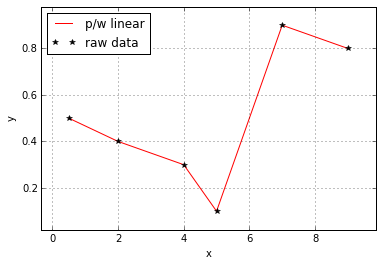

In [2]:
%pylab inline

# Invent some raw data 
x=numpy.array([0.5,2.0,4.0,5.0,7.0,9.0])
y=numpy.array([0.5,0.4,0.3,0.1,0.9,0.8])

# For clarity we are going to add a small margin to all the plots.
pylab.margins(0.1)

# We want to overlay a plot the raw data a few times so lets make this a function.
def plot_raw_data(x,y):
    # Plot the data as black stars
    pylab.plot(x,y,'k*',label='raw data')
    pylab.xlabel('x')
    pylab.ylabel('y')
    pylab.grid(True)

# The simple plot function you used in Introduction to Programming last term
# will show a piecewise-linear approximation:
pylab.plot(x,y,'r',label='p/w linear')

# Overlay raw data
plot_raw_data(x,y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

We can use [scipy.interpolate.lagrange](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)
from [SciPy](http://www.scipy.org) to generate the **Lagrange polynomial** for a dataset as shown below.

<span style="color:red">(Note: SciPy provides a [wide range of interpolators](http://docs.scipy.org/doc/scipy/reference/interpolate.html) with many different properties which we do not have time to go into in this course. When you need to interpolate data for your specific application then you should look up the literature to ensure you are using the best one.)</span>

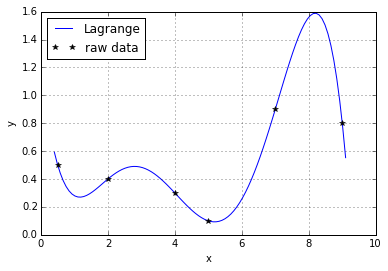

In [3]:
import scipy.interpolate

# Create the Lagrange polynomial for the given points.
lp=scipy.interpolate.lagrange(x, y)

# Evaluate this fuction at a high resolution so that we can get a smooth plot. 
xx=numpy.linspace(0.4, 9.1, 100)
pylab.plot(xx, lp(xx), 'b', label='Lagrange')

# Overlay raw data
plot_raw_data(x, y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

### <span style="color:blue">Exercise 1.1: The Lagrange basis polynomials evaluated at the data locations </span>

For a given $i$, what value does $\ell_i(x_j)$ takes for every value of $j$ (i.e. for each of the data points).

What is the Mathematical name for the function $\ell_i(x)$?

### <span style="color:blue">Exercise 1.2: Picewise-linear Lagrange interpolant </span>

What are the Lagrange basis polynomials when $N=1$?

Evaluate by *pen and paper* the linear approximation $L_1(x)$ (i.e. the Lagrange polynomial of degree 1) which passes through the two points $(0.0,0.1),(1.0,0.9)$.

Notice that this method is just a glorified approach to obtain the equation of a line you are familar with: $y=mx+c$.

# Error in Lagrange interpolation

Note that it can be proven that in the case where we are interpolating a known function (e.g. a complex non-polynomial function by a simpler polynomial), the error is proportional to the distance from any of the data points (which makes sense as the error is obviously zero at these points) and to the $(n+1)$-st derivative of that function evaluated at some location within the bounds of the data.  I.e. the more complex (sharply varying) the function is, the higher the error could be.


### <span style="color:blue">Exercise 1.3: Approximating a function </span>

Sample the function $y(x)=x^3$ at the points $x=(1,2,3)$.  

Write your own Python function to construct the Lagrange polynomials $L_0$, $L_1$ and $L_2$. Plot the resulting polynomials along with the error compared to the original exact function. (<span style="color:green">Guru tip: Using the pylab function [fill_between](http://matplotlib.org/examples/pylab_examples/fill_between_demo.html) provides a nice way of illustrating the difference between graphs.</span>)

C:\Users\matt\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


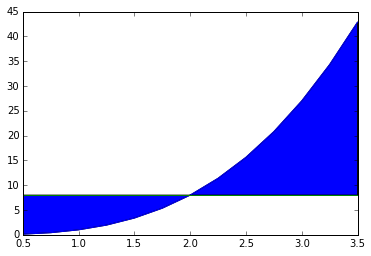

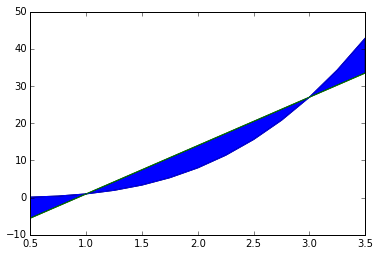

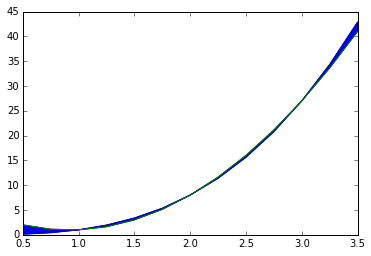

In [4]:
def func_x3(x):
    return x**3

def plot_approximation(f, xi):
    # Original function. 
    x=numpy.linspace(0.5, 3.5, 13)
    pylab.plot(x, f(x))

    lp=scipy.interpolate.lagrange(xi, f(xi))
    pylab.plot(x, lp(x))

    pylab.fill_between(x, f(x), lp(x))
    pylab.show()


# L0
plot_approximation(func_x3, numpy.array([2., ]))
    
# L1
plot_approximation(func_x3, numpy.array([1., 3.]))

# L2
plot_approximation(func_x3, numpy.array([1., 2., 3.]))

## Newton polynomial

Calculating the Newton polynomial (also called [Newtons divided difference interpolation polynomial](http://mathworld.wolfram.com/NewtonsDividedDifferenceInterpolationFormula.html)) yields the same polynomial the Lagrange polynomial method (remember that the polynomial of minimum degree to pass through each data point is unique), but are considered easier to implement.

The degree $n$ polynomial is now written in the form

$$ P_n(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + (x-x_0)(x-x_1)\ldots(x-x_n)a_n,$$

where $a_0, a_1, \ldots, a_n$ are our $n+1$ free parameters we need to find using the $n+1$ pieces of information we have in the given data.

Efficient implementation of algorithms follows from noticing that we can write this polynomial in a recursive form.  Consider for example $n=3$:

\begin{aligned}
P_3(x) &= a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + (x-x_0)(x-x_1)(x-x_2)a_3\\
&= a_0 +(x-x_0)[a_1 + (x-x_1)[a_2 + (x-x_2)a_3]].
\end{aligned}

Notice that substituting in the $x_i$ values leads to a set of simultaneous equations where we can easily evaluate the unknowns $a_0,a_1,\ldots$ using 'back (or forward) substitution':

1. Substitute $x=x_0$: We have $a_0 = P_3(x_0)$ which we know must be $y_0$.

2. Now substitute $x=x_1$: We have $P_3(x_1) = a_0 +(x_1-x_0)a_1$, the LHS of this is $y_1$, and we know everything on the RHS as we have already calculated $a_0 = y_0$: 
$$ a_1 = \frac{(y_1 - y_0)}{(x_1-x_0)}.$$
3. Substituting $x=x_2$ yields 
\begin{aligned}
& y_2 = P_3(x_2) = a_0 +(x_2-x_0)[a_1 + (x_2-x_1)a_2] = y_0 + (x_2-x_0)\left[ \frac{(y_1 - y_0)}{(x_1-x_0)} + (x_2-x_1)a_2\right]\\
&\implies a_2 = \frac{ \frac{(y_2 - y_0)}{(x_2-x_0)} - \frac{(y_1 - y_0)}{(x_1-x_0)}}{x_2-x_1}
\end{aligned}
4. and so on...


Introducing the *divided difference* notation

\begin{aligned}
\Delta y_i &= \frac{y_i-y_0}{x_i-x_0},\quad i=1,2,\ldots n\\
\Delta^2 y_i &= \frac{\Delta y_i-\Delta y_1}{x_i-x_1},\quad i=2,\ldots n\\
&\vdots\\
\Delta^n y_n &= \frac{\Delta^{n-1} y_n-\Delta^{n-1} y_{n-1}}{x_n-x_{n-1}}\\
\end{aligned}

The coefficients of the interpolating polynomial are in general terms

$$a_0=y_0,\quad a_1 = \Delta y_1, \quad a_2 = \Delta^2 y_2, \quad \ldots \quad a_n = \Delta^n y_n.$$


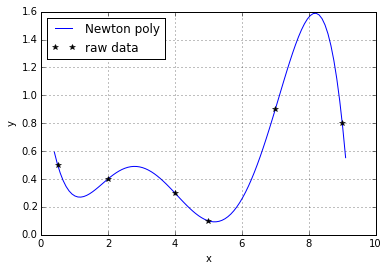

In [5]:
# consider the above example data again
x=numpy.array([0.5,2.0,4.0,5.0,7.0,9.0])
y=numpy.array([0.5,0.4,0.3,0.1,0.9,0.8])

# evaluate the coefficients a_i recursively using Newton's method
a=y.copy()
m=len(a)
for k in range(1, m):
    for i in range(k, m):
        a[i] = (a[i] - a[k-1])/(x[i]-x[k-1])

# Given the coefficients a, and the data locations x,
# define a function to evaluate the Newton polynomial 
# at locations given in the array xx.  
# NB. this is just an evaluation of the P_n(x) = ... formula
# given at the start of this 'Newton's method section.
def eval_poly(a, x, xx):
    n=len(x)-1 # polynomial degree
    # recursively build up polynomial evaluated at xx    
    p=a[n]
    for k in range(1, n+1):
        p = a[n-k] + (xx-x[n-k])*p
    return p

# Evaluate the polynomial at high resolution and plot
xx=numpy.linspace(0.4, 9.1, 100)
pylab.plot(xx, eval_poly(a,x,xx), 'b', label='Newton poly')

# Overlay raw data
plot_raw_data(x, y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

# Curve fitting
Curve-fitting in the [least squares](http://mathworld.wolfram.com/LeastSquaresFitting.html) sense is popular when the dataset contains noise (nearly always the case when dealing with real world data). This is straightforward to do for polynomials of different polynomial degree using [numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), see below.

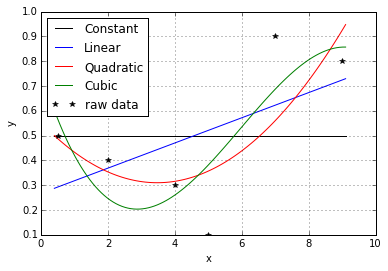

In [8]:
# Calculate coefficients of polynomial degree 0 - ie a constant value.
poly_coeffs=numpy.polyfit(x, y, 0)

# Construct a polynomial function which we can use to evaluate for arbitrary x values.
p0 = numpy.poly1d(poly_coeffs)
pylab.plot(xx, p0(xx), 'k', label='Constant')

# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=numpy.polyfit(x, y, 1)
p1 = numpy.poly1d(poly_coeffs)
pylab.plot(xx, p1(xx), 'b', label='Linear')

# Quadratic
poly_coeffs=numpy.polyfit(x, y, 2)
p2 = numpy.poly1d(poly_coeffs)
pylab.plot(xx, p2(xx), 'r', label='Quadratic')

# Cubic
poly_coeffs=numpy.polyfit(x, y, 3)
p3 = numpy.poly1d(poly_coeffs)
pylab.plot(xx, p3(xx), 'g', label='Cubic')

# Overlay raw data
plot_raw_data(x, y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

### <span style="color:blue">Exercise 1.4: Squared error calculation</span>

As described in the docs ([numpy.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)), least squares fitting minimises the square of the difference between the data provided and the polynomial,

$$E = \sum_{i=0}^{k} (p(x_i) - y_i)^2,$$

where $p(x_i)$ is the value of the polynomial function that has been fit to the data evaluated at point $x_i$, and $y_i$ is the $i^th$ data value.

Write a Python fucntion that evaluates the squared error, $E$, and use this function to evaluate the error for each of the polynomials calculated above. <span style="color:green">Tip: Try to pass the function *p* in as an argument to your error calculation function. One of the great features of Python is that it is easy to pass in functions as arguments.</span>

Why is the square of the difference used? 

In [12]:
def sqr_error(p, xi, yi):
# we use the square of the difference to ensure each contribution
# to the total error is positive, otherwise errors of different signs
# could/would cancel out giving a false estimate of good our approximation is
    diff2 = (p(xi)-yi)**2 
    return diff2.sum()

print sqr_error(p0, x, y)
print sqr_error(p1, x, y)
print sqr_error(p2, x, y)
print sqr_error(p3, x, y)

0.46
0.332988992379
0.199478242143
0.157303436623


### <span style="color:blue">Exercise 1.5: Degree of approximation </span>

Extend the example above by fitting and plotting polynomials of increasing degree past cubic. At what *degree* does the resulting polynomial approximation equate to the Lagrange interpolant?

Why does this make sense? 

<span style="color:green">Hint: think about the number of free parameters in a polynomial, and the amount of data you have.</span>

Number of points to fit:  6
Error:  2.31688457878e-25


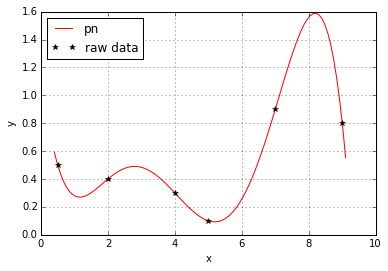

In [24]:
print "Number of points to fit: ", size(x)
# in this example we have 6 pieces of information, to fit a polynomial
# that exactly goes through these points we need 6 unknowns, or free 
# parameters, to choose in the polynomial.  [Too few and we won't be able
# to fit the data exaclty, and too many would just be a waste.  Cf. over-
# and under-determined systems.]
# A 5th order polynomial has 6 free parameters (all the powers up to 5,
# including 0).
# So calling polyfit to fit a polynomial of degree 5 (size(x)-1) should
# fit the data exactly (repeat below with size(x)-2 etc, and size(x) and 
# above to convince yourself of this):
poly_coeffs=numpy.polyfit(x, y, size(x)-1)
pn = numpy.poly1d(poly_coeffs)
pylab.plot(xx, pn(xx), 'r', label='pn')

print "Error: ", sqr_error(pn, x, y)

# Overlay raw data
plot_raw_data(x, y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

# Extrapolation

Take to remember that *interpolation* by definition is used to estimate $y$ for values of $x$ within the bounds of the available data (here $[0.5,0]$) with some confidence. *Extrapolation* on the other hand is the process of estimating (e.g. using the interpolating function) $y$ *outside* the bounds of the available data. However, extrapolation requires a great deal of care as it will become increasingly inaccurate as you go further out of bounds.

### <span style="color:blue">Exercise 1.6: Extrapolation </span>

Recreate the plots in the example above for different degrees of polynomial, setting the x-range from -2.0 to 11.0. What do you notice about exterpolation when you use higher degree polynomials.

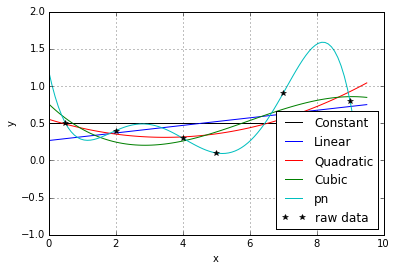

In [26]:
xx = numpy.linspace(-2., 11., 100)
pylab.plot(xx, p0(xx), 'k', label='Constant')
pylab.plot(xx, p1(xx), 'b', label='Linear')
pylab.plot(xx, p2(xx), 'r', label='Quadratic')
pylab.plot(xx, p3(xx), 'g', label='Cubic')
pylab.plot(xx, pn(xx), 'c', label='pn')

# Overlay raw data
plot_raw_data(x, y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

# NB. if you set the limits of the x data to numpy.linspace(0., 9.5, 100)
# and replot this will result in you zooming in on the data to better see
# how each polynomial fits the data, but less clearly shows the major 
# problem with extrapolation.

# Challenge of the day

### <span style="color:blue">Exercise 1.7: Submarine landslide size in the North Atlantic </span>

Open the data file [Length-Width.dat](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/data/Length-Width.dat) giving the lengths and widths of submarine landslides in the North Atlantic basin [from [Huhnerbach & Masson, 2004](http://www.sciencedirect.com/science/article/pii/S0025322704002774), Fig. 7].  Fit a linear best fit line using polyfit and try to recreate the image below.

<span style="color:green">Hint: You will need to take the long of the data before fitting a line to it. </span>

!["Cloud of point data for submarine landslide widths and depths in the North Atlantic, and a correspondong best (linear) curve fit."](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/images/Width-Length.png)


Reference: [V. Huhnerbach, D.G. Masson, Landslides in the North Atlantic and its adjacent seas:
an analysis of their morphology, setting and behaviour, Marine Geology 213 (2004) 343 – 362.](http://www.sciencedirect.com/science/article/pii/S0025322704002774)

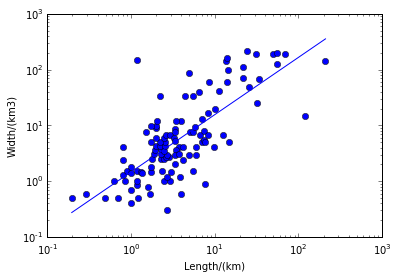

In [27]:
file = open("data/Length-Width.dat", 'r')
x=[]
y=[]
for line in file:
    x.append(float(line.split()[0]))
    y.append(float(line.split()[1]))
x = numpy.array(x)
y = numpy.array(y)

pylab.plot(x, y, 'bo')

logx = log(x)
logy = log(y)

# fit a linear line to the log of the data
poly_coeffs=numpy.polyfit(logx, logy, 1) 
# Construct the corresponding polynomial function from these coefficients
linefit = numpy.poly1d(poly_coeffs)

xx = numpy.linspace(min(logx), max(logx), 2)
pylab.plot(exp(xx), exp(linefit(xx)), 'b')

pylab.xscale('log')
pylab.yscale('log')

pylab.xlabel("Length/(km)")
pylab.ylabel("Width/(km3)")

pylab.show()

### <span style="color:blue">Exercise 1.8: Curve fitting with a cubic polynomial </span>

Given the data points

|  x  |  y  |
|-----|-----|
| 0.1 | 0.3 |
| 0.3 | 0.1 |
| 1.0 | 0.2 |
| 1.4 | 0.3 |
| 2.8 | 0.7 |
| 4.5 | 0.9 |

compute a polynomial function of degree 3 (cubic function) to fit a curve to the given data points and plot the polynomial function as well as the raw data points.

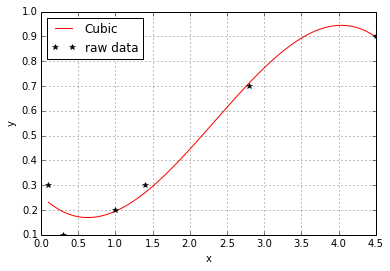

In [24]:
# consider the above example data again
x=numpy.array([0.1,0.3,1.0,1.4,2.8,4.5])
y=numpy.array([0.3,0.1,0.2,0.3,0.7,0.9])

xx=numpy.linspace(0.1, 4.5, 100)

# Cubic
poly_coeffs=numpy.polyfit(x, y, 3)
p3 = numpy.poly1d(poly_coeffs)
pylab.plot(xx, p3(xx), 'r', label='Cubic')

# Overlay raw data
plot_raw_data(x, y)

# Add a legend
pylab.legend(loc='best')

pylab.show()

# Lecture 2: Numerical Linear Algebra I

## Learning objectives:

* Manipulation of matrices and matrix equations in Python
* Reminder on properties of matrices (from MM1): determinants, singularity etc
* Algorithms for the solution of linear systems (this week we focus on so-called direct methods)
* Gaussian elimination, including back substitution

## Introduction - Linear (matrix) systems

Recall from your Mathematical Methods I course that the we can re-write a system of simultaneous (linear) equations in matrix form.  For example, in week 4 of MM1 you considered the following example:

\begin{eqnarray*}
  2x + 3y &=& 7 \\
   x - 4y &=& 3
\end{eqnarray*} 

and it was noted that this can be written in matrix form as 

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    1 & -4  \\
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y \\
  \end{array}
\right) = \left(
  \begin{array}{c}
    7 \\
    3 \\
  \end{array}
\right)
$$

More generally, consider the arbitrary system of $m$ linear equations for $m$ unknowns

\begin{eqnarray*}
  A_{11}x_1 + A_{12}x_2 + \dots + A_{1n}x_n &=& b_1 \\ 
  A_{21}x_1 + A_{22}x_2 + \dots + A_{2n}x_n &=& b_2 \\ 
  \vdots &=& \vdots \\ 
  A_{n1}x_1 + A_{n2}x_2 + \dots + A_{nn}x_n &=& b_n
\end{eqnarray*}

where $A_{ij}$ are the constant coefficients of the linear system, $x_j$ are the unknown variables, and $b_i$
are the terms on the right hand side (RHS).  Here the index $i$ is referring to the equation number
(the row in the matrix below), with the index $j$ referring to the component of the unknown
vector $\pmb{x}$ (the column of the matrix).

This system of equations can be represented as the matrix equation $A\pmb{x}=\pmb{b}$: 

$$
\left(
  \begin{array}{cccc}
    A_{11} & A_{12} & \dots & A_{1n} \\
    A_{21} & A_{22} & \dots & A_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    A_{n1} & A_{n2} & \dots & A_{nn} \\
  \end{array}
\right)\left(
         \begin{array}{c}
           x_1 \\
           x_2 \\
           \vdots \\
           x_n \\
         \end{array}
       \right)  = \left(
                   \begin{array}{c}
                     b_1 \\
                     b_2 \\
                     \vdots \\
                     b_n \\
                   \end{array}
                 \right)
$$

We solved the above $2 \times 2$ example of two equations and two unknowns in MM1 using substitution, *i.e.* multiply the second equation by 2 and subtract the first equation from the resulting equation to eliminate $x$ and hence allowing us to find $y$, we can then compute $x$ from the first equation) to easily give the solution 

$$ x=37/11, \quad y=1/11.$$

In MM1 you also considered $3 \times 3$ examples which were a little more complicated but still doable.  This lecture considers the case of $n \times n$ where $n$ could easily be billions! This case arises when you solve a differential equation numerically on a discrete mesh or grid. Here you would typically obtain one unknown and one (discrete, linear or nonlinear) equation at very grid point. You could generate an arbitrarily large matrix system simply by generating a finer mesh.

Note that you will solve differential equations numerically in the follow-up course Numerical Methods II.

Cases where the matrix is non-square, i.e. of shape $m \times n$ where $m\ne n$ correspond to the (over- or under-determined) system where you have more or less equations than unknowns - we won't consider these in this lecture. 


## Matrices in Python

We have already used numpy arrays to store one-dimensional vectors of numbers.

The convention is that these are generally considered to be *column* vectors and have shape $n \times 1$.

We can extend to higher dimensions through the introduction of matrices as two-dimensional arrays (more generally vectors and matrices are just two examples of tensors). 

We use subscript indices to identify each component of the array or matrix, i.e. we can identify each component of the vector $\pmb{v}$ by $v_i$, and each component of the vector $A$ by $A_{ij}$.  

Note that it is a convention that vectors are either underlined or bold, and generally lower case letters, whereas matrices are plain capital letters.

The *dimension* or *shape* of a vector/matrix is the number of rows and columns it posesses, i.e. $n \times 1$ and $m \times n$ for the examples above.

Here is an example of how we can extend our use of the numpy array object to two dimensions in order to define a matrix $A$ and some examples of some operations we can make on it.

In [3]:
import numpy
from scipy import linalg
A=numpy.array([[10., 2., 1.],[6., 5., 4.],[1., 4., 7.]])

print A

[[ 10.   2.   1.]
 [  6.   5.   4.]
 [  1.   4.   7.]]


In [2]:
# the total size of the array storing A - here 9 for a 3x3 matrix
print numpy.size(A)  

9


In [3]:
# the number of dimensions of the matrix A
print numpy.ndim(A)     

2


In [4]:
# the shape of the matrix A
print numpy.shape(A)

(3, 3)


In [5]:
# the transpose of the matrix A
print A.T               

[[ 10.   6.   1.]
 [  2.   5.   4.]
 [  1.   4.   7.]]


In [6]:
# the inverse of the matrix A - computed using a scipy algorithm
print linalg.inv(A)     

[[ 0.14285714 -0.07518797  0.02255639]
 [-0.28571429  0.51879699 -0.2556391 ]
 [ 0.14285714 -0.28571429  0.28571429]]


In [7]:
# the determinant of the matrix A - computed using a scipy algorithm
print linalg.det(A)      

133.0


In [8]:
# Multiply A with its inverse using numpy's dot. Note that due to
# roundoff errors the off diagonal values are not exactly zero.
print numpy.dot(A,linalg.inv(A))  

[[  1.00000000e+00  -1.11022302e-16  -8.32667268e-17]
 [  1.11022302e-16   1.00000000e+00   2.77555756e-17]
 [ -2.22044605e-16   0.00000000e+00   1.00000000e+00]]


In [9]:
# same way to achieve the same thing
print A.dot(linalg.inv(A))  

[[  1.00000000e+00  -1.11022302e-16  -8.32667268e-17]
 [  1.11022302e-16   1.00000000e+00   2.77555756e-17]
 [ -2.22044605e-16   0.00000000e+00   1.00000000e+00]]


In [10]:
# note that the * operator simply does operations element-wise
print A*linalg.inv(A)     

[[ 1.42857143 -0.15037594  0.02255639]
 [-1.71428571  2.59398496 -1.02255639]
 [ 0.14285714 -1.14285714  2.        ]]


In [11]:
# how to initialise a vector of zeros 
print numpy.zeros(3)  

[ 0.  0.  0.]


In [12]:
# how to initialise a matrix of zeros 
print numpy.zeros((3,3)) 

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [13]:
# how to initialise a 3rd-order tensor of zeros
print numpy.zeros((3,3,3))  

[[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


In [14]:
# how to initialise the identity matrix, I or Id
print numpy.eye(3)  

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


Let's quickly consider the $2 \times 2$ case from MM1 recreated above where we claimed that $x=37/11$ and $y=1/11$.  

To solve the matrix equation 

$$ A\pmb{x}=\pmb{b} $$

we can simply multiply both sides by the inverse of the matrix $A$ (if $A$ is invertible and if we know what the inverse is of course!):

\begin{align}
A\pmb{x} & = \pmb{b}\\
\implies A^{-1}A\pmb{x} & = A^{-1}\pmb{b}\\
\implies I\pmb{x} & = A^{-1}\pmb{b}\\
\implies \pmb{x} & = A^{-1}\pmb{b}
\end{align}

so we can find the solution $\pmb{x}$ by multiplying the inverse of $A$ with the RHS vector $\pmb{b}$.

In [15]:
A=numpy.array([[2., 3.],[1., -4.]])

# check first whether the determinant of A is non-zero - see below for reasons why.
print(linalg.det(A))   

-11.0


In [16]:
b=numpy.array([7., 3.])

# compute A inverse and multiply by b
print numpy.dot(linalg.inv(A),b) 

[ 3.36363636  0.09090909]


In [17]:
b=numpy.array([7., 3.])

# compute A inverse and multiply by b
print numpy.dot(linalg.inv(A),b) 

[ 3.36363636  0.09090909]


In [18]:
# or solve the linear system using scipy - actually does the same thing as line above using LU (see below)
print linalg.solve(A,b)

print "Check it against the solution we calculated by hand earlier: ", 37./11., 1./11.

[ 3.36363636  0.09090909]
Check it against the solution we calculated by hand earlier:  3.36363636364 0.0909090909091


### <span style="color:blue">Aside: matrix objects </span>

Note that numpy does possess a matrix object as a sub-class of the numpy array.  We can cast the above two-dimensional arrays into matrix objects and then the star operator does yield the expected matrix product:

In [19]:
# the is an n-dimensional array (n-2 here)
print type(A)  

<type 'numpy.ndarray'>


In [20]:
# this casts the array A into the matrix class
print type(numpy.mat(A))

<class 'numpy.matrixlib.defmatrix.matrix'>


In [21]:
# for these objects * is standard matrix multuiplication and we can check that A*A^{-1}=I as expected
print numpy.mat(A)*numpy.mat(linalg.inv(A))

[[ 1.  0.]
 [ 0.  1.]]


### <span style="color:blue">Slicing </span>

Remember from last term that just as for arrays or lists, we can use *slicing*  in order to extract components of matrices, for example:

In [22]:
A=numpy.array([[10., 2., 1.],[6., 5., 4.],[1., 4., 7.]])
print A 

[[ 10.   2.   1.]
 [  6.   5.   4.]
 [  1.   4.   7.]]


In [23]:
# single entry, first row, second column
print A[0,1]    

2.0


In [24]:
# first row
print A[0,:]    

[ 10.   2.   1.]


In [25]:
# last row
print A[-1,:]   

[ 1.  4.  7.]


In [26]:
# second column
print A[:,1]    

[ 2.  5.  4.]


In [27]:
# extract a 2x2 sub-matrix
print A[1:3,1:3]  

[[ 5.  4.]
 [ 4.  7.]]


## Properties of matrices: determinants, singularity, solvability of linear systems, etc

Consider $N$ linear equations in $N$ unknowns, $A\pmb{x}=\pmb{b}$. 

From MM1 you learnt that this system has a *unique solution* provided that the determinant of A, $\det(A)$, is non-zero. In this case the matrix is said to be *non-singular*.

If $\det(A)=0$ (with $A$ then termed a *singular matrix*), then the linear system does *not* have a unique solution, it may have either infinite *or* no solutions.

For example, consider

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6  \\
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y \\
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    8 \\
  \end{array}
\right)
$$

The second equation is simply twice the first, and hence a solution to the first equation is also automatically a solution to the second equation. 

We hence only have one *linearly-independent* equation, and our problem is under-constrained: we effectively only have one eqution for two unknowns with infinitely many possibly solutions. 

If we replaced the RHS vector with $(4,7)^T$, then the two equations would be contradictory: in this case we have no solutions.

Note that a set of vectors where one can be written as a linear sum of the others are termed *linearly-dependent*. When this is not the case the vectors are termed *linearly-independent*.

The following properties of a square $n\times n$ matrix are equivalent:

* $\det(A)\ne 0$ - A is non-singular

* The columns of $A$ are linearly independent

* The rows of $A$ are linearly independent

* The columns of A *span* $n$-dimensional space (recall MM1 - we can reach any point in $\mathbb{R}^N$ through a linear combination of these vectors - note that this is simply what the operation $A\pmb{x}$ is doing of course if you write it out)

* $A$ is invertible, i.e. there exists a matrix $A^{-1}$ such that $A^{-1}A = A A^{-1}=I$

* the matrix system $A\pmb{x}=\pmb{b}$ has a unique solution for every vector $b$


## Gaussian elimination - method


The Gaussian elimination algorithm is simply a systematic implementation of the method of equation substitution we used above to solve the $2\times 2$ system (i.e. where we "multiply the second equation by 2 and subtract the first equation from the resulting equation to *eliminate* $x$ and hence allowing us to find $y$, we can then compute $x$ from the first equation").

So *Gaussian elimination*  as the method is atributed to the mathematician *Gauss* (although it was certainly known before his time) and *elimination* as we seek to eliminate unknowns.

To perform this method for arbitrarily large systems (on paper) we form the so-called augmented matrix

$$
[A|\pmb{b}] = 
\left[
  \begin{array}{rr|r}
    2 & 3 & 7 \\
    1 & -4 & 3  \\
  \end{array}
\right]
$$

First we multiplied the second equation by 2, this yield the updated augmented matrix:

$$
\left[
  \begin{array}{rr|r}
    2 & 3 & 7 \\
    2 & -8 & 6 \\
  \end{array}
\right]
$$

We can use the following notation to describe this operation:

$$ Eq. (2) \leftarrow 2\times Eq. (2) $$

Note importantly that this does not change anything about what these pair of equations are telling us about the unknown solution vector $\pmb{x}$ which although it doesn't appear is implicilty defined by this augmented equation.

The next step was to subtract the first equation from the updated second ($ Eq. (2) \leftarrow Eq. (2) - Eq. (1) $):

$$
\left[
  \begin{array}{rr|r}
    2 & 3 & 7 \\
    0 & -11 & -1 \\
  \end{array}
\right]
$$

The square matrix that is now in the $A$ position of this augmented system is an example of an *upper-triangular* matrix - all entries below the diagonal are zero.  For such a matrix we can perform back substitution - starting at the bottom to solve trivially for the final unknown ($y$ here which clearly takes the value $-1/-11$), and then using this knowledge working our way up to solve for each remaining unknown in turn, here just $x$ (solving $2x + 3\times (1/11) = 7$).

Note that we can perform the similar substitution if we had a lower triangular matrix, first finding the first unknown and then working our way forward through the remaining unknows - hence in this case *forward substitution*.

Note that if we wished we could of course continue working on the augmented matrix to make the $A$ component diagonal: divide the second equation by 11 ($ Eq. (2) \leftarrow (1/11)\times Eq. (2) $) and add it to the first ($ Eq. (1) \leftarrow Eq. (1) +  Eq. (2) $):

$$
\left[
  \begin{array}{rr|r}
    2 & 0 & 7-3/11\\
    0 & -1 & -1/11 \\
  \end{array}
\right]
$$

and we can further make it the identity by dividing the rows by $2$ and $-1$ respectively ($ Eq. (1) \leftarrow (1/2)\times Eq. (1) $, $ Eq. (2) \leftarrow (1/-1)\times Eq. (2) $) :

$$
\left[
  \begin{array}{rr|r}
    1 & 0 & (7-3/11)/2 \\
    0 & 1 & 1/11 \\
  \end{array}
\right]
$$

Each of these augmented matrices encodes exactly the same information as the original matrix system in terms of the unknown vector $\pmb{x}$, and hence this is telling us that

$$ \pmb{x} = I \pmb{x} = \left[
  \begin{array}{c}
    (7-3/11)/2 \\
    1/11 \\
  \end{array}
\right]
$$

i.e. exactly the solution we found when we performed back substitution from the upper-triangular form of the augmented system.


### <span style="color:blue">Exercise 2.1: Gaussian elimination $3 \times 3$ example (by hand) </span>

Consider the system of linear equations

\begin{align*}
  2x + 3y - 4z &= 10 \\
  3x -  y + 2z &= 3 \\
  4x + 2y + 2z &= 8
\end{align*}

write this in matrix form, form the corresponding augmented system and perform row operations until you get to upper-triangular form, find the solution using back substitution (**do this all with pen and paper**).

Write some code to check your answer using `numpy.dot(linalg.inv(A),b)`.

You should find $x=43/23$, $y=24/23$, $z=-18/23$.


In [37]:
A = numpy.array([[2.,3.,-4.],[3.,-1.,2.],[4.,2.,2.]])
b = numpy.array([10.,3.,8.])
print numpy.dot(linalg.inv(A),b)
print 43./23, 24./23, -18./23


[ 1.86956522  1.04347826 -0.7826087 ]
1.8695652173913044 1.0434782608695652 -0.782608695652174


## Gaussian elimination - algorithm and code

Note that we are free to perform the following operations on the augmented system without changing the corresponding solution:

* Exchange two rows (refer to the section on *partial pivoting* next week)

* Multiply a row by a non-zero constant ($Eq. (i)\leftarrow \lambda \times Eq.(i)$)

* Subtracting a (non-zero) multiple of one row with another ($Eq. (i)\leftarrow Eq. (i) - \lambda \times Eq.(j)$)


Note that the equation/row being subtracted is termed the *pivot*.


Let's consider the algorithm mid-way working on an arbitrary matrix system, i.e. assume that the first $k$ rows (i.e. above the horizontal dashed line in the matrix below) have already been transformed into upper-triangular form, while the equations/rows below are not yet in this form.

The augmented equation in this case can be assumed to look like

$$
\left[
  \begin{array}{rrrrrrrrr|r}
    A_{11} & A_{12} & A_{13} & \cdots & A_{1k} & \cdots & A_{1j} & \cdots & A_{1n} & b_1 \\
    0      & A_{22} & A_{23} & \cdots & A_{2k} & \cdots & A_{2j} & \cdots & A_{2n} & b_2 \\
    0      & 0      & A_{33} & \cdots & A_{3k} & \cdots & A_{3j} & \cdots & A_{3n} & b_3 \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \ddots & \vdots & \ddots & \vdots & \vdots \\
    0      & 0      & 0      & \cdots & A_{kk} & \cdots & A_{kj} & \cdots & A_{kn} & b_k \\    
\hdashline
    \vdots & \vdots & \vdots & \ddots & \vdots & \ddots & \vdots & \ddots & \vdots & \vdots \\
    0      & 0      & 0      & \cdots & A_{ik} & \cdots & A_{ij} & \cdots & A_{in} & b_i \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \ddots & \vdots & \ddots & \vdots & \vdots \\
    0      & 0      & 0      & \cdots & A_{nk} & \cdots & A_{nj} & \cdots & A_{nn} & b_n \\
\end{array}
\right]
$$

Remember that here as we are mid-way through the algorithm the $A$'s and $b$'s in the above are not the same as in the original system!

Our aim as a next step in the algorithm is to use row $k$ (the pivot row) to *eliminate* $A_{ik}$, and we need to do this for all of the rows $i$ below the pivot, i.e. for all $i>k$.

To eliminate $A_{ik}$ for a single row $i$ we need to perform the operation 
$$ Eq. (i)\leftarrow Eq. (i) - \frac{A_{ik}}{A_{kk}} \times Eq.(k) $$

or equivalently

\begin{align}
A_{ij} &\leftarrow A_{ij} - \frac{A_{ik}}{A_{kk}} A_{kj}, \quad j=k,k+1,\ldots,n\\
b_i &\leftarrow b_i - \frac{A_{ik}}{A_{kk}} b_{k}
\end{align}

$j$ only needs to run from $k$ upwards as we can assume that the earlier entries in column $i$ have already been set to zero, and also that the corresponding terms from the pivot row are also zero (we don't need to perform operations that we know involve the addition of zeros!).

And to eliminate these entries for all rows below the pivot we need to repeat for all $i>k$.

### <span style="color:blue">Exercise 2.2: Gaussian elimination</span>

Write some code that takes a matrix $A$ and a vector $\pmb{b}$ and converts it into upper-triangular form using the above algorithm. For the $2 \times 2$ and $3\times 3$ examples from above compare the resulting $A$ and $\pmb{b}$ you obtain following elimination.


In [5]:
# Basic solution.

def upper_triangle(A, b):
    # Assuming it is a square matrix of size nxn.
    n = numpy.size(b)
    
    # Loop over each pivot row.
    for k in range(n-1):
        # Loop over each equation below the pivot row.
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed as you are
            # over-writing A
            s = (A[i,k]/A[k,k])
            # we don't start the following loop from 0 as we can assume
            # some entries in the rows are already zero
            for j in range(k, n): 
                A[i,j] = A[i,j] - s*A[k,j]
            b[i] = b[i] - s*b[k]

# Initialise a test matrix and RHS. Make sure they are initialised as floats.
A = numpy.array([[2., 3., -4.],
                 [3., -1., 2.],
                 [4., 2., 2.]])
b = numpy.array([10., 3., 8.])

upper_triangle(A, b)

# Here is a new trick for you - "pretty print"
from pprint import pprint
pprint(A)
pprint(b)

array([[ 2.        ,  3.        , -4.        ],
       [ 0.        , -5.5       ,  8.        ],
       [ 0.        ,  0.        ,  4.18181818]])
array([ 10.        , -12.        ,  -3.27272727])


### Back substitution

Now that we have an augmented system in the upper-triangular form

$$
\left[
  \begin{array}{rrrrr|r}
    A_{11} & A_{12} & A_{13} & \cdots & A_{1n} &  b_1 \\
    0      & A_{22} & A_{23} & \cdots & A_{2n} &  b_2 \\
    0      & 0      & A_{33} & \cdots & A_{3n} &  b_3 \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    0      & 0      & 0      & \cdots & A_{nn} &  b_n \\    
\end{array}
\right]
$$

where the solution $\pmb{x}$ of the original system also satisfies $A\pmb{x}=\pmb{b}$ for the $A$ and $\pmb{b}$ in the above upper-triangular form (rather than the original $A$ and $\pmb{b}$!).

We can solve the final equation row to yield

$$x_n = \frac{b_n}{A_{nn}}$$

The second to last equation then yields (note we've introduced a comma in the subscripts here simply to make the more complex double indices easier to read)

\begin{align}
A_{n-1,n-1}x_{n-1} + A_{n-1,n}x_n &= b_{n-1}\\
\implies x_{n-1} = \frac{b_{n-1} - A_{n-1,n}x_n}{A_{n-1,n-1}}\\
\implies x_{n-1} = \frac{b_{n-1} - A_{n-1,n}\frac{b_n}{A_{nn}}}{A_{n-1,n-1}}
\end{align}

and so on to row $k$ which yields

\begin{align}
A_{k,k}x_{k} + A_{k,k+1}x_{k+1} +\cdots +  A_{k,n}x_n &= b_{k}\\
\iff A_{k,k}x_{k} + \sum_{j=k+1}^{n}A_{kj}x_j &= b_{k}\\
\implies x_{k} &= \left( b_k - \sum_{j=k+1}^{n}A_{kj}x_j\right)\frac{1}{A_{kk}}
\end{align}

### <span style="color:blue">Exercise 2.3: Back substitution</span>

Extend your code to perform back substitution and hence to obtain the final solution $\pmb{x}$.  Check against the solutions found earlier.  Come up with some random $n\times n$ matrices and check your code against `numpy.dot(linalg.inv(A),b)` (remember to use the original $A$ and $\pmb{b}$ here of course!)


In [8]:
# This function assumes that A is already an upper triangular matrix.
def back_substitution(A, b):
    n = numpy.size(b)
    
    x = numpy.zeros(n)
    for k in range(n-1, -1, -1):
        s = 0.
        for j in range(k+1, n):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]
    
    return x

# and this A is the upper triangular matrix carried forward 
# from the Python box above
pprint(back_substitution(A, b)) # the solution using your codes
        
# check your answer against just multiplying A inverse and b   
pprint(numpy.dot(linalg.inv(A),b)) 

array([ 1.86956522,  1.04347826, -0.7826087 ])
array([ 1.86956522,  1.04347826, -0.7826087 ])


### Gauss-Jordan elimination

Recall that for the augmented matrix example we did by hand above we continued past the upper-triangular form so that the augmneted matrix had the identity matrix in the $A$ location. This algorithm has the name Gauss-Jordan elimination but note that it requires more operations than the conversion to upper-triangular form followed by back subsitution and so is only of academic interest.

### Matrix inversion

Note that if we were to form the augmented equation with the full identity matrix in the place of the vector $\pmb{b}$, i.e. $[A|I]$ and performed row operations exactly as above until $A$ is transformed into the identity matrix $I$, then we would be left with the inverse of $A$ in the original $I$ location, i.e.

$$ [A|I] \rightarrow [I|A^{-1}] $$ 

### <span style="color:blue">Exercise 2.4: Matrix inversion</span>

Try updating your code to construct the inverse matrix.

In [10]:
# This updated version of the upper_triangular function now
# assumes that a matrix, B, is in the old vector location
# in the augmented system, and applied the same operations to
# B as to A - only a minor difference
def upper_triangle2(A, B):
    n, m = numpy.shape(A)
    assert(n==m)  # this is designed to work for a square matrix
    
    # Loop over each pivot row.
    for k in range(n-1):
        # Loop over each equation below the pivot row.
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed as you are
            # over-writing A
            s = (A[i,k]/A[k,k])
            for j in range(n):
                A[i,j] = A[i,j] - s*A[k,j]
                B[i,j] = B[i,j] - s*B[k,j]

                
# and this is a version which transforms the matrix into lower
# triangular form - the point here is that if you give it a 
# matrix that is already in upper traingular form, then the 
# result will be a diagonal matrix
def lower_triangle2(A, B):
    n, m = numpy.shape(A)
    assert(n==m) # this is designed to work for a square matrix

    # now it's basically just the upper triangular algorithm applied backwards 
    for k in range(n-1, -1, -1):      
        for i in range(k-1, -1, -1):
            s = (A[i,k]/A[k,k])
            for j in range(n):
                A[i,j] = A[i,j] - s*A[k,j]
                B[i,j] = B[i,j] - s*B[k,j]

    
# Let's redefine A as our matrix above
A = numpy.array([[2.,3.,-4.],[3.,-1.,2.],[4.,2.,2.]])
# and B is the identity of the corresponding size
B = numpy.eye(numpy.shape(A)[0])
# transform A into upper triangular form (and perform the same operations on B)
upper_triangle2(A, B)
pprint(A)
# now make this updated A lower triangular as well (the result should be diagonal)
lower_triangle2(A, B)
pprint(A)
# final step is just to divide each row through by the value of the diagonal
# to end up with the identity in the place of A
for i in range(numpy.shape(A)[0]):
    B[i,:] = B[i,:]/A[i,i] 
    A[i,:] = A[i,:]/A[i,i]

# the final A should be the identity 
pprint(A)
# the final B should therefore be the inverse of the original B
pprint(B)
# let's compute the inverse using in-biult functions and check 
# we get the same answer
pprint(linalg.inv(numpy.array([[2.,3.,-4.],[3.,-1.,2.],[4.,2.,2.]])))

array([[ 2.        ,  3.        , -4.        ],
       [ 0.        , -5.5       ,  8.        ],
       [ 0.        ,  0.        ,  4.18181818]])
array([[ 2.        ,  0.        ,  0.        ],
       [ 0.        , -5.5       ,  0.        ],
       [ 0.        ,  0.        ,  4.18181818]])
array([[ 1.,  0.,  0.],
       [-0.,  1., -0.],
       [ 0.,  0.,  1.]])
array([[ 0.13043478,  0.30434783, -0.04347826],
       [-0.04347826, -0.43478261,  0.34782609],
       [-0.2173913 , -0.17391304,  0.23913043]])
array([[ 0.13043478,  0.30434783, -0.04347826],
       [-0.04347826, -0.43478261,  0.34782609],
       [-0.2173913 , -0.17391304,  0.23913043]])


### <span style="color:blue">Exercise 2.5: Zeros on the diagonal</span>

You may have noticed above that we have no way of guaranteeing that the $A_{kk}$ we divide through by in the Guassian elimination or back substitution algorithms is non-zero (or not very small which will also lead to computational problems).
Note also that we commented that we are free to exchange two rows in our augmented system - how could you use this fact to build robustness into our algorithms in order to deal with matrices for which our algorithms do lead to very small or zero $A_{kk}$ values?  

More on this next week!

In [12]:
# Advanced solution to 2.2 with row swapping - this makes the method robust
# against possible divide by zero (or some very number). Improves
# the numerical "stability" of the algorithm.  If we don't add this robustness
# then for a general matrix we just have to keep our fingers-crossed that
# we don't hit a zero or small number!


# This function swaps rows in matrix A 
# (and remembers that we need to do likewise for the vector b we are performing
# the same operations on)
def swap_row(A, b, i, j): 
    if i==j:
        return

    # Make sure it is a real copy - not just a copy of a 
    # reference to the data!
    iA = numpy.copy(A[i, :])
    ib = numpy.copy(b[i])
    
    A[i, :] = A[j, :]
    b[i] = b[j]
    
    A[j, :] = iA
    b[j] = ib

# This is a new version of the upper_triangular function
# with the added step of swapping rows so the largest 
# magnitude number is always our pivot
def upper_triangle(A, b):
    n = numpy.size(b)

    for k in range(n-1):
        # Swap rows so we are always dividing through by the largest number.
        kmax = k
        for i in range(k+1, n):
            if abs(A[kmax, k]) < abs(A[i, k]):
                kmax = i
        swap_row(A, b, kmax, k)
        
        for i in range(k+1, n):
            s = (A[i,k]/A[k,k])
            for j in range(k, n):
                A[i,j] = A[i,j] - s*A[k,j]
            b[i] = b[i] - s*b[k]
    
A = numpy.array([[2.,3.,-4.],
                 [3.,-1.,2.],
                 [4.,2.,2.]])
b = numpy.array([10.,3.,8.])

upper_triangle(A, b)

pprint(A)
pprint(b)

array([[ 4. ,  2. ,  2. ],
       [ 0. , -2.5,  0.5],
       [ 0. ,  0. , -4.6]])
array([ 8. , -3. ,  3.6])


### <span style="color:blue">Exercise 2.6: Gaussian elimination </span>

Write some code that takes a matrix $A$ and a vector $\pmb{b}$ and converts it into upper-triangular form and compare the resulting $\pmb{A}$ and $\pmb{b}$ you obtain following elimination. Then use back substitution to obtain the final solution $\pmb{x}$.

Note: You can use `numpy.dot(linalg.inv(A),b)` to check your solution for $\pmb{x}$.

For this exercise, consider the system of linear equations

\begin{align*}
  2x + -3y + 4z &= 5 \\
  x -  y + 5z &= 0 \\
  -x + 2y + 7z &= -2
\end{align*}

In [36]:
# Basic solution.

def back_substitution(A, b):
    n = numpy.size(b)
    
    x = numpy.zeros(n)
    for k in range(n-1, -1, -1):
        s = 0.
        for j in range(k+1, n):
            s = s + A[k, j]*x[j]
        x[k] = (b[k] - s)/A[k, k]
    
    return x

def upper_triangle(A, b):
    # Assuming it is a square matrix of size nxn.
    n = numpy.size(b)
    
    # Loop over each pivot row.
    for k in range(n-1):
        # Loop over each equation below the pivot row.
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed as you are
            # over-writing A
            s = (A[i,k]/A[k,k])
            # we don't start the following loop from 0 as we can assume
            # some entries in the rows are already zero
            for j in range(k, n): 
                A[i,j] = A[i,j] - s*A[k,j]
            b[i] = b[i] - s*b[k]

# Initialise a test matrix and RHS. Make sure they are initialised as floats.
A = numpy.array([[2., -3., 4.],
                 [1., -1., 5.],
                 [-1, 2., 7.]])
b = numpy.array([5., 0., -2.])
# Here is a new trick for you - "pretty print"
from pprint import pprint
pprint(A)
pprint(b)

# printing the solution found with linalg.inv(...):
from scipy import linalg
pprint(numpy.dot(linalg.inv(A),b))

upper_triangle(A, b)
pprint(A)
pprint(b)

# printing the solution for x
pprint(back_substitution(A, b))

array([[ 2., -3.,  4.],
       [ 1., -1.,  5.],
       [-1.,  2.,  7.]])
array([ 5.,  0., -2.])
array([-10.5,  -8. ,   0.5])
array([[ 2. , -3. ,  4. ],
       [ 0. ,  0.5,  3. ],
       [ 0. ,  0. ,  6. ]])
array([ 5. , -2.5,  3. ])
array([-10.5,  -8. ,   0.5])


# Lecture 3: Numerical Linear Algebra II

## Learning objectives:

* More on direct methods: LU decomposition
* Doolittle's algorithm
* Properties of lower-triangular matrices
* Partial pivoting

## Introduction

Last week we developed and implemented the Gaussian elimination method to solve the linear matrix system ($A\pmb{x}=\pmb{b}$). 

This week we will consider a closely related solution method: *LU decomposition* or *LU factorisation*.

Both are examples of *direct* solution methods - next week we will consider the alternate approach to solve linear systems, namely iterative or indirect methods.

## LU decomposition - theory

Last week we implemented Gaussian elimination to solve the matrix system with *one* RHS vector $\pmb{b}$.  

We often have to deal with problems where we have multiple RHS vectors, all with the same matrix $A$.  

We could call the same code multiple times to solve all of these corresponding linear systems, but note that as the elimination algorithm is actually performing operations based upon (the same) $A$ each time, we would actually be wasting time repeating exactly the same operations - this is therefore clearly not an efficient solution to this problem.

We could easily generalise our Gaussian elimination/back subsitution algorithms to include multiple RHS column vectors in the augmented system, perform the same sequence of row operations (but now only once) to transform the matrix to upper-triangular form, and then perform back substitution on each of the transformed RHS vectors from the augmented system - cf. the use of Gaussian elimination to compute the inverse to a matrix by placing the identity on the right of the augmented system.

However, it is often the case that each RHS vector depends on the solutions to the matrix systems obtained from some or all of the earlier RHS vectors, and so this generalisation would not work in this case. Note that an example of this you will see in NM2 is where you are time-stepping the solution to a differential equation, and the RHS vector depends on the solution at the previous time level.

To deal with this situation efficiently we *decompose* or *factorise* the matrix $A$ in such a way that it is cheap to compute a new solution vector $\pmb{x}$ for any given RHS vector $\pmb{b}$.  This decompisition involves a lower- and an upper-triangular matrix, hence the name LU decomposition. These matrices essentially *encode* the steps conducted in Gaussian elimination, so we don't have to explicilty conduct all of the operations again and again.

Mathematically, let's assume that we have already found/constructed a lower-triangular matrix ($L$ - where all entries above the diagonal are zero) and an upper-triangular matrix ($U$ - where all entries above the diagonal are zero) such that we can write

$$ A = LU $$

In this case the matrix system we need to solve for $\pmb{x}$ becomes

$$ A\pmb{x} = \pmb{b} \iff (LU)\pmb{x} = L(U\pmb{x}) = \pmb{b} $$

Notice that the matrix-vector product $U\pmb{x}$ is itself a vector, let's call it $\pmb{c}$ for the time-being (i.e. 
$\pmb{c}=U\pmb{x}$).

The above system then reads 

$$ L\pmb{c} = \pmb{b} $$

where $L$ is a matrix and $\pmb{c}$ is an unknown.  

As $L$ is in lower-triangular form we can use forward substitution (generalising the back subsitution algorithm/code we developed last week) to very easily find $\pmb{c}$ in relatively few operations (we don't need to call the entire Gaussian elimination algorithm).

Once we know $\pmb{c}$ we then solve the second linear system 

$$ U\pmb{x} = \pmb{c} $$

where now we can use the fact that $U$ is upper-triangular to use our back substitution algorithm again very efficiently to give the solution $\pmb{x}$ we require.

So for a given $\pmb{b}$ we can find the corresponding $\pmb{x}$ very efficiently, we can therefore do this repeatedly as each new $\pmb{b}$ is given to us.

Our challenge is therefore to find the matrices $L$ and $U$ allowing us to perform the decomposition $A=LU$.


## LU decomposition - algorithm

Recall the comment above on the $L$ and $U$ matrices encoding the steps taken in Gaussian elimination.  Let's see how this works through the development of the so-called Doolittle algorithm.

Let's consider an example matrix:

$$
  A=\begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
{\color{black}5} & {\color{black}14} & {\color{black}7} & {\color{black}10}\\
{\color{black}20} & {\color{black}77} & {\color{black}41} & {\color{black}48}\\
{\color{black}25} & {\color{black}91} & {\color{black}55} & {\color{black}67}\\
    \end{bmatrix}
$$

the first step of Gaussian elimination is to set the
sub-diagonal elements in the first column to zero by subtracting multiples of
the first row from each of the subsequent rows. 

For this example, using the symbolic notiation from last week
this requires the row operations

\begin{align}
Eq. (2) &\leftarrow Eq. (2) - 1\times Eq. (1)\\
Eq. (3) &\leftarrow Eq. (3) - 4\times Eq. (1)\\
Eq. (4) &\leftarrow Eq. (4) - 5\times Eq. (1)\\
\end{align}

or mathematically, and for each element of the matrix (remembering that we are adding rows together - while one of
the entries of a row will end up being zero, this also has the consequence of updating the rest of the values in that row, hence the iteration over $j$ below):

\begin{align}
A_{2j} &\leftarrow A_{2j} - \frac{A_{21}}{A_{11}} A_{1j} = A_{2j} - \frac{5}{5} \times A_{1j}, \quad j=1,2,3,4\\
A_{3j} &\leftarrow A_{3j} - \frac{A_{31}}{A_{11}} A_{1j} = A_{3j} - \frac{20}{5} \times A_{1j}, \quad j=1,2,3,4\\
A_{4j} &\leftarrow A_{4j} - \frac{A_{41}}{A_{11}} A_{1j} = A_{4j} - \frac{25}{5} \times A_{1j}, \quad j=1,2,3,4\\
\end{align}

Notice that we can also write these exact operations on elements in terms of multiplication by a carefully chosen lower-triangular matrix where the non-zero's below the diagonal restricted to a single column, e.g. for the example above

$$
  \begin{bmatrix}
    {\color{black}1} & {\color{black}0} & {\color{black}0} & {\color{black}0}\\
    {\color{Orange}{-1}} & {\color{black}1} & {\color{black}0} & {\color{black}0}\\
    {\color{Orange}{-4}} & {\color{black}0} & {\color{black}1} & {\color{black}0}\\
    {\color{Orange}{-5}} & {\color{black}0} & {\color{black}0} & {\color{black}1}\\   
  \end{bmatrix}\qquad\times\qquad\begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{black}5} & {\color{black}14} & {\color{black}7} & {\color{black}10}\\
    {\color{black}20} & {\color{black}77} & {\color{black}41} & {\color{black}48}\\
    {\color{black}25} & {\color{black}91} & {\color{black}55} & {\color{black}67}\\   
  \end{bmatrix}\qquad=\qquad\begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{blue}{0}} & {\color{blue}{7}} & {\color{blue}{2}} & {\color{blue}{1}}\\
    {\color{blue}{0}} & {\color{blue}{49}} & {\color{blue}{21}} & {\color{blue}{12}}\\
    {\color{blue}{0}} & {\color{blue}{56}} & {\color{blue}{30}} & {\color{blue}{22}}\\    
  \end{bmatrix}
$$

The lower-triangular matrix (let's call this one $L_0$) is thus encoding the first step in Gaussian elimination.

The next step involves taking the second row of the updated matrix as the new pivot (we will ignore partial pivoting for simplicity), and subtracting multiples of this row from those below in order to set the zeros below the diagonal in the second column to zero. 

This can be achieved here with the multiplication by the following lower-triangular matrix (call this one $L_1$)

\begin{equation*}
  \begin{bmatrix}
    {\color{black}1} & {\color{black}0} & {\color{black}0} & {\color{black}0}\\
    {\color{black}0} & {\color{black}1} & {\color{black}0} & {\color{black}0}\\
    {\color{black}0} & {\color{Orange}{-7}} & {\color{black}1} & {\color{black}0}\\
    {\color{black}0} & {\color{Orange}{-8}} & {\color{black}0} & {\color{black}1}\\
  \end{bmatrix}\qquad\times\qquad\begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{black}0} & {\color{black}7} & {\color{black}2} & {\color{black}1}\\
    {\color{black}0} & {\color{black}49} & {\color{black}21} & {\color{black}12}\\
    {\color{black}0} & {\color{black}56} & {\color{black}30} & {\color{black}22}\\
  \end{bmatrix}\qquad=\qquad\begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{black}0} & {\color{black}7} & {\color{black}2} & {\color{black}1}\\
    {\color{black}0} & {\color{blue}{0}} & {\color{blue}{7}} & {\color{blue}{5}}\\
    {\color{black}0} & {\color{blue}{0}} & {\color{blue}{14}} & {\color{blue}{14}}\\
  \end{bmatrix}
\end{equation*}


and finally for this example

\begin{equation*}
  \begin{bmatrix}
    {\color{black}1} & {\color{black}0} & {\color{black}0} & {\color{black}0}\\
    {\color{black}0} & {\color{black}1} & {\color{black}0} & {\color{black}0}\\
    {\color{black}0} & {\color{black}0} & {\color{black}1} & {\color{black}0}\\
    {\color{black}0} & {\color{black}0} & {\color{Orange}{-2}} & {\color{black}{1}}\\
  \end{bmatrix}\qquad\times\qquad\begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{black}0} & {\color{black}7} & {\color{black}2} & {\color{black}1}\\
    {\color{black}0} & {\color{black}0} & {\color{black}7} & {\color{black}5}\\
    {\color{black}0} & {\color{black}0} & {\color{black}14} & {\color{black}14}\\
  \end{bmatrix}\qquad=\qquad\begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{black}0} & {\color{black}7} & {\color{black}2} & {\color{black}1}\\
    {\color{black}0} & {\color{black}0} & {\color{black}7} & {\color{black}5}\\
    {\color{black}0} & {\color{black}0} & {\color{blue}{0}} & {\color{blue}{4}}\\
  \end{bmatrix}
\end{equation*}

where this lower triangular matrix we'll call $L_2$, and the RHS matrix is now in upper-triangular form as we expect from Gaussian elimination (call this $U$).

In summary, the above operations can be written as 

$$ L_2(L_1(L_0A)) = U $$

(where $A$ here is the original matrix).

Note that these lower-triangular matrices are examples pf what is known as an *atomic* lower-triangular matrix is a special form of unitriangular matrix - the diagonals are unity, and the off-diagonal entries are all zero apart from in a single column. The inverse of such a matrix is the original with the sign of those off-diagnonals changed:

$$
\left[
  \begin{array}{rrrrrrrrr}
    1      & 0      & \cdots      &        &              &        &         &   & 0 \\
    0      & 1      & 0           & \cdots &              &        &         &   & 0 \\
    0      & \ddots & \ddots      & \ddots &              &        &         &   &  \vdots \\
    \vdots & \ddots & \ddots      & \ddots &              &        &         &   &  \\
           &        &             &   0    &   1          &  0     &         & &  &  \\           
           &        &             &   0    &   l_{i+1,i}  &  1     &  \ddots &   &  &  \\  
           &        &             &   0    &   l_{i+2,i}  &  0     &  \ddots &   & &  \\  
           &        &             & \vdots &   \vdots     & \vdots &  \ddots &   & 0 &  \\               
    0      & \cdots &             & 0      &   l_{n,i}    & 0      &  \cdots & 0 & 1 &  \\    
\end{array}
\right]^{-1}
=
\left[
  \begin{array}{rrrrrrrrr}
    1      & 0      & \cdots      &        &              &        &         &   & 0 \\
    0      & 1      & 0           & \cdots &              &        &         &   & 0 \\
    0      & \ddots & \ddots      & \ddots &              &        &         &   &  \vdots \\
    \vdots & \ddots & \ddots      & \ddots &              &        &         &   &  \\
           &        &             &   0    &   1          &  0     &         & &  &  \\           
           &        &             &   0    &   -l_{i+1,i}  &  1     &  \ddots &   &  &  \\  
           &        &             &   0    &   -l_{i+2,i}  &  0     &  \ddots &   & &  \\  
           &        &             & \vdots &   \vdots     & \vdots &  \ddots &   & 0 &  \\               
    0      & \cdots &             & 0      &   -l_{n,i}    & 0      &  \cdots & 0 & 1 &  \\    
\end{array}
\right]
$$


### <span style="color:blue">Exercise 3.1: lower-triangular matrices</span>

Convince yourselves of the following facts:

* The multiplication of arbitrary lower-triangular square matrices is also lower-triangular.

* $L_2(L_1(L_0A)) = U \implies A = L_0^{-1}(L_1^{-1}(L_2^{-1}U))$

* and hence that $A=LU$ where $U$ is the upper-triangular matrix found at the end of Guassian elimination, and where $L$ is the 
following  matrix
$$ L = L_0^{-1}L_1^{-1}L_2^{-1} $$

* Finally, compute this product of these lower-triangular matrices to show that 
$$L = 
  \begin{bmatrix}
    {\color{black}1} & {\color{black}0} & {\color{black}0} & {\color{black}0}\\
    {\color{black}{1}} & {\color{black}1} & {\color{black}0} & {\color{black}0}\\
    {\color{black}{4}} & {\color{black}7} & {\color{black}1} & {\color{black}0}\\
    {\color{black}{5}} & {\color{black}8} & {\color{black}2} & {\color{black}1}\\   
  \end{bmatrix}
$$
i.e. that the multiplication of these individual atomic matrices (importantly in this order) simply merges the entries from the non-zero columns of each atomic matrix, and hence is both lower-triangular, as well as trivial to compute.

In [6]:
import numpy as np
from scipy import linalg
from pprint import pprint

# as above: A matrix,
A=np.array([[5., 7. , 5., 9.],
            [5., 14.,   7.,  10.],
            [20., 77., 41., 48.],
            [25., 91.,  55., 67.]])
# lower triangular matrices,
L0 = np.array([[1,0,0,0],[-1,1,0,0],[-4,0,1,0],[-5,0,0,1]])
L1 = np.array([[1,0,0,0],[0,1,0,0],[0,-7,1,0],[0,-8,0,1]])
L2 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,-2,1]])
# and their inverse matrices
L0_ = linalg.inv(L0)
L1_ = linalg.inv(L1)
L2_ = linalg.inv(L2)

# our base matrix
pprint(A)

# ad: The multiplication of arbitrary lower-triangular square matrices is also lower-triangular
pprint(np.dot(L0, L1))
pprint(np.dot(L2, L1))

# ad: L2(L1(L0 A)) = U
U = np.dot(L2, np.dot(L1, np.dot(L0, A)))
pprint(U)

# ad: A = L0^-1(L1^-1(L2^-1 U))
A = np.dot(L0_, np.dot(L1_, np.dot(L2_, U))) 
pprint(A)

# ad: L = L0^-1 L1^-1 L2^-1
L = np.dot(L0_,np.dot(L1_,L2_))
pprint(L)

# ad: A = LU
# numpy.allclose takes two numpy arrays and checks whether all elements are identical to some tolerance
np.allclose(A, np.dot(L, U)) 

array([[  5.,   7.,   5.,   9.],
       [  5.,  14.,   7.,  10.],
       [ 20.,  77.,  41.,  48.],
       [ 25.,  91.,  55.,  67.]])
array([[ 1,  0,  0,  0],
       [-1,  1,  0,  0],
       [-4, -7,  1,  0],
       [-5, -8,  0,  1]])
array([[ 1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0, -7,  1,  0],
       [ 0,  6, -2,  1]])
array([[ 5.,  7.,  5.,  9.],
       [ 0.,  7.,  2.,  1.],
       [ 0.,  0.,  7.,  5.],
       [ 0.,  0.,  0.,  4.]])
array([[  5.,   7.,   5.,   9.],
       [  5.,  14.,   7.,  10.],
       [ 20.,  77.,  41.,  48.],
       [ 25.,  91.,  55.,  67.]])
array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 4.,  7.,  1.,  0.],
       [ 5.,  8.,  2.,  1.]])


True

## LU decomposition - implementation

So we can build an LU code easily from our Gaussian elimination code.  The final $U$ matrix we need here is as is already constructed through Gaussian elimination, the entries of $L$ we need are simply the ${A_{ik}}/{A_{kk}}$ multipliers we computed as part of the elimination, but threw away previously.

For a given pivot row $k$, for each of these multipliers (for every row below the pivot), as we compute them we know that we are going to transform the augmented matrix in order to achieve a new zero below the diagonal - we can store each multiplier in this position before moving on to the following row, we implicitly know that the diagonals of $L$ will be unity and so don't need to store these (and noting that we don't actually have a space for them anyway!). We then move on to the following pivot row, replacing the zeros in the corresponding column we are zero'ing, but again using the now spare space to store the multipliers.

For example, for the case above 

$$ A = 
  \begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{black}5} & {\color{black}14} & {\color{black}7} & {\color{black}10}\\
    {\color{black}20} & {\color{black}77} & {\color{black}41} & {\color{black}48}\\
    {\color{black}25} & {\color{black}91} & {\color{black}55} & {\color{black}67}\\   
  \end{bmatrix}\quad\rightarrow\quad
  \begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{blue}{1}} & {\color{black}{7}} & {\color{black}{2}} & {\color{black}{1}}\\
    {\color{blue}{4}} & {\color{black}{49}} & {\color{black}{21}} & {\color{black}{12}}\\
    {\color{blue}{5}} & {\color{black}{56}} & {\color{black}{30}} & {\color{black}{22}}\\    
  \end{bmatrix}\quad\rightarrow\quad
  \begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{blue}1} & {\color{black}7} & {\color{black}2} & {\color{black}1}\\
    {\color{blue}4} & {\color{blue}{7}} & {\color{black}{7}} & {\color{black}{5}}\\
    {\color{blue}5} & {\color{blue}{8}} & {\color{black}{14}} & {\color{black}{14}}\\
  \end{bmatrix}\quad\rightarrow\quad
  \begin{bmatrix}
    {\color{black}5} & {\color{black}7} & {\color{black}5} & {\color{black}9}\\
    {\color{blue}1} & {\color{black}7} & {\color{black}2} & {\color{black}1}\\
    {\color{blue}4} & {\color{blue}7} & {\color{black}7} & {\color{black}5}\\
    {\color{blue}5} & {\color{blue}8} & {\color{blue}{2}} & {\color{black}{4}}\\
  \end{bmatrix}
  = [\color{blue}L\backslash U]
$$



In [3]:
import numpy
from scipy import linalg
A=numpy.array([[ 5., 7.,   5.,  9.],
               [ 5., 14.,  7., 10.],
               [20., 77., 41., 48.],
               [25., 91. ,55., 67.]])
print A

[[  5.   7.   5.   9.]
 [  5.  14.   7.  10.]
 [ 20.  77.  41.  48.]
 [ 25.  91.  55.  67.]]


In [4]:
P,L,U=linalg.lu(A)

# P here is a 'permutation matrix' that performs swaps based upon partial pivoting
print P  

[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]]


In [5]:
# the lower-triangular matrix
print L  

[[ 1.          0.          0.          0.        ]
 [ 0.2         1.          0.          0.        ]
 [ 0.8        -0.375       1.          0.        ]
 [ 0.2         0.375       0.33333333  1.        ]]


In [6]:
# the upper-triangular matrix
print U  

[[ 25.          91.          55.          67.        ]
 [  0.         -11.2         -6.          -4.4       ]
 [  0.           0.          -5.25        -7.25      ]
 [  0.           0.           0.           0.66666667]]


In [7]:
# double check that P*L*U does indeed equal A
print numpy.dot(P, numpy.dot(L, U)) 

[[  5.   7.   5.   9.]
 [  5.  14.   7.  10.]
 [ 20.  77.  41.  48.]
 [ 25.  91.  55.  67.]]


Looking at the form of $P$ above, we can re-order the rows in advance and consider the LU decomposition of the matrix where $P=I$, as below. As we haven't bothered implementing pivoting ourselves, check that your LU implementation recreates the $A$, $L$ and $U$ below.

In [8]:
import numpy
from scipy import linalg
A=numpy.array([[25. ,91. ,55. ,67.],
               [ 5.,  7.,  5.,  9.], 
               [20., 77., 41., 48.],
               [ 5., 14., 7.,  10.]])
print A

[[ 25.  91.  55.  67.]
 [  5.   7.   5.   9.]
 [ 20.  77.  41.  48.]
 [  5.  14.   7.  10.]]


In [9]:
P,L,U=linalg.lu(A)
# P now should be the identity as pivoting no longer actually actions any row swaps with this A
print P  

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [10]:
print L

[[ 1.          0.          0.          0.        ]
 [ 0.2         1.          0.          0.        ]
 [ 0.8        -0.375       1.          0.        ]
 [ 0.2         0.375       0.33333333  1.        ]]


In [11]:
print U

[[ 25.          91.          55.          67.        ]
 [  0.         -11.2         -6.          -4.4       ]
 [  0.           0.          -5.25        -7.25      ]
 [  0.           0.           0.           0.66666667]]


In [12]:
print numpy.dot(P, numpy.dot(L, U))

[[ 25.  91.  55.  67.]
 [  5.   7.   5.   9.]
 [ 20.  77.  41.  48.]
 [  5.  14.   7.  10.]]


### <span style="color:blue">Exercise 3.2: LU decomposition</span>

Starting from your Gaussian elimination code produce a new code to compute the LU decomposition of a matrix.

In [7]:
import numpy as np
import scipy.linalg as sl
from pprint import pprint

def LU_dec(A):
    # upper triangular matrix contains gaussian elimination result
    # we won't change A in-place but create a local copy
    A = A.copy()
    m, n = A.shape
    # lower triangular matrix has identity diagonal and scaling factors
    L = np.identity(n)
    # Loop over each pivot row.
    for k in range(n):
        # Loop over each equation below the pivot row.
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed.
            s = (A[i,k]/A[k,k])
            for j in range(k, n):
                A[i,j] = A[i,j] - s*A[k,j]
            # scaling factors make up the lower matrix 
            L[i,k] = s
    # A now is the upper triangular matrix U
    return L, A


A = np.array([[ 5., 7.,   5.,  9.],
              [ 5., 14.,  7., 10.],
              [20., 77., 41., 48.],
              [25., 91. ,55., 67.]])

L, U = LU_dec(A)

pprint(A)
pprint(L)
pprint(U)
np.allclose(np.dot(L,U), A)

array([[  5.,   7.,   5.,   9.],
       [  5.,  14.,   7.,  10.],
       [ 20.,  77.,  41.,  48.],
       [ 25.,  91.,  55.,  67.]])
array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 4.,  7.,  1.,  0.],
       [ 5.,  8.,  2.,  1.]])
array([[ 5.,  7.,  5.,  9.],
       [ 0.,  7.,  2.,  1.],
       [ 0.,  0.,  7.,  5.],
       [ 0.,  0.,  0.,  4.]])


True

## Partial pivoting

At the end of last week we commented that a problem could occur where the $A_{kk}$ we divide through by in the Gaussian elimination and/or back substitution algorithms might be (near) zero.

Using Gaussian elinination as an example, let's again consider the algorithm mid-way working on an arbitrary matrix system, i.e. assume that the first $k$ rows have already been transformed into upper-triangular form, while the equations/rows below are not yet in this form:

$$
\left[
  \begin{array}{rrrrrrr|r}
    A_{11} & A_{12} & A_{13} & \cdots & A_{1k}  & \cdots & A_{1n} & b_1 \\
    0      & A_{22} & A_{23} & \cdots & A_{2k} & \cdots & A_{2n} & b_2 \\
    0      & 0      & A_{33} & \cdots & A_{3k}  & \cdots & A_{3n} & b_3 \\
    \vdots & \vdots & \vdots & \ddots & \vdots  & \ddots & \vdots & \vdots \\
\hdashline    
    0      & 0      & 0      & \cdots & A_{kk}  & \cdots & A_{kn} & b_k \\    
    \vdots & \vdots & \vdots & \ddots & \vdots  & \ddots & \vdots & \vdots \\
    0      & 0      & 0      & \cdots & A_{nk}  & \cdots & A_{nn} & b_n \\
\end{array}
\right]
$$

Note we have drawn the horizontal dashed line one row higher, as we are not going to blindly asssume that it is wise to take the current row $k$ as the pivot row, and $A_{kk}$ as the so-called pivot element.

*Partial pivoting* selects the best pivot (row or element) as the one where the $A_{ik}$ (for $i\ge k$) value is largest (relative to the other values of components in its own row $i$), and then swaps this row with the current $k$ row.

To generalise our codes above we would simply need to search for this row, and perform the row swap operation.

# Challenge of the day

### <span style="color:blue">Exercise 3.3: Partial pivoting</span>

Implement partial pivoting.

In [1]:
import numpy as np
from pprint import pprint

# Part of Ex. 3.3. This function is not necessary but makes the LU_dec_pp function less cluttered
# Making general operations into functions is good way of improving readability and reducing your workload later!
def swap_rows(A,j,k):
    B = np.copy(A[j,:])
    C = np.copy(A[k,:])
    # second label, BUT NOT CREATING A 2ND ARRAY. Try it for yourself if you want.
    A[k,:] = B
    A[j,:] = C
    return A

# Ex. 3.3 A function to perform LU decomposition with partial pivoting
def LU_dec_pp(A):
    m, n = A.shape
    A = A.copy() # wo won't modify in place but create local copy
    P_ = np.identity(m)
    L  = np.identity(m)
    for k in range(m):
        j = np.argmax(abs(A[k:,k])) 
        # Find the index of the largest ABSOLUTE value. np.argmax will return 
        # the index of the largest element in an array
        j+= k               # A[1+2,2] = A[3,2] = 3!        
        A  = swap_rows(A,j,k)
        P_ = swap_rows(P_,j,k)
        for j in range(k+1,m):
            s = A[j,k]/A[k,k]
            A[j,k:] -= A[k,k:]*s  
            L[j,k] = s
    U = A   
    return P_.T, L, U

A = np.array([[ 5., 7.,   5.,  9.],
              [ 5., 14.,  7., 10.],
              [20., 77., 41., 48.],
              [25., 91. ,55., 67.]])

P, L, U = LU_dec_pp(A)
pprint(A)
pprint(L)
pprint(U)
pprint(np.dot(P, np.dot(L,U)))
np.allclose(np.dot(P, np.dot(L,U)), A)

array([[  5.,   7.,   5.,   9.],
       [  5.,  14.,   7.,  10.],
       [ 20.,  77.,  41.,  48.],
       [ 25.,  91.,  55.,  67.]])
array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.2       ,  1.        ,  0.        ,  0.        ],
       [ 0.8       , -0.375     ,  1.        ,  0.        ],
       [ 0.2       ,  0.375     ,  0.33333333,  1.        ]])
array([[ 25.        ,  91.        ,  55.        ,  67.        ],
       [  0.        , -11.2       ,  -6.        ,  -4.4       ],
       [  0.        ,   0.        ,  -5.25      ,  -7.25      ],
       [  0.        ,   0.        ,   0.        ,   0.66666667]])
array([[  5.,   7.,   5.,   9.],
       [  5.,  14.,   7.,  10.],
       [ 20.,  77.,  41.,  48.],
       [ 25.,  91.,  55.,  67.]])


True

Note the solution was given at the end of the solutions to last week's lecture.

### <span style="color:blue">Exercise 3.4: LU decomposition </span>

Write a code to compute the LU decomposition of a matrix $\pmb{A}$.

$A = \left[
\begin{array}{rrr}
  1 & 4 & 1\\
  1 & 2 & -2\\
  2 & -4.5 & -9
\end{array}\right]$

In [38]:
import numpy as np
import scipy.linalg as sl
from pprint import pprint

def LU_dec(A):
    # upper triangular matrix contains gaussian elimination result
    # we won't change A in-place but create a local copy
    A = A.copy()
    m, n = A.shape
    # lower triangular matrix has identity diagonal and scaling factors
    L = np.identity(n)
    # Loop over each pivot row.
    for k in range(n):
        # Loop over each equation below the pivot row.
        for i in range(k+1, n):
            # Define the scaling factor outside the innermost
            # loop otherwise its value gets changed.
            s = (A[i,k]/A[k,k])
            for j in range(k, n):
                A[i,j] = A[i,j] - s*A[k,j]
            # scaling factors make up the lower matrix 
            L[i,k] = s
    # A now is the upper triangular matrix U
    return L, A


A = np.array([[ 1., 4.,   1.],
              [ 1., 2.,  -2.],
              [2., -4.5, -9.]])

L, U = LU_dec(A)

pprint(A)
pprint(L)
pprint(U)
np.allclose(np.dot(L,U), A)

array([[ 1. ,  4. ,  1. ],
       [ 1. ,  2. , -2. ],
       [ 2. , -4.5, -9. ]])
array([[ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  1.  ,  0.  ],
       [ 2.  ,  6.25,  1.  ]])
array([[ 1.  ,  4.  ,  1.  ],
       [ 0.  , -2.  , -3.  ],
       [ 0.  ,  0.  ,  7.75]])


True

# Lecture 4: Numerical Linear Algebra III

## Learning objectives:

* Ill-conditioned matrices (matrix norms and condition number)
* Direct vs iterative/indirect methods
* Example iterative algorithm: the Jacobi and Gauss-Seidel methods
* Sparse matrices and a pointer to more advanced algorithms

## Ill-conditioned matrices

The conditioning (or lack of, i.e. the ill-conditioning) of matrices we are trying to invert (to obtain the inverse, or to find the solution to a linear matrix system) is incredibly important for the success of any algorithm.

When we started talking about matrices we noted that as long as the matrix is non-singular, i.e. $\det(A)\ne 0$ then an inverse exists, and a linear system with that $A$ has a unique solution.

But what happens when we consider a matrix that is nearly singluar, i.e. $\det(A)$ is very small?

Well smallness is a relative term and so we need to ask the question of how large or small $\det(A)$ is compared to something.

That something is the *norm* of the matrix.

#### Vector norms

Just as for vectors $\pmb{v}$ (assumed a $n\times 1$ column vector) where we have multiple possible norms to help us decide quantify the magnitude of a vector:

\begin{align}
\|\pmb{v}\|_2 & = \sqrt{v_1^2 + v_2^2 + \ldots + v_n^2} = \left(\sum_{i=1}^n v_i^2 \right)^{1/2}, &\quad{\textrm{the two-norm or Euclidean norm}}\\
\|\pmb{v}\|_1  & = |v_1| + |v_2| + \ldots + |v_n| = \sum_{i=1}^n |v_i|, &\quad{\textrm{the one-norm or taxi-cab norm}}\\
\|\pmb{v}\|_{\infty}  &= \max\{|v_1|,|v_2|, \ldots, |v_n| = \max_{i=1}^n |v_i|, &\quad{\textrm{the max-norm or infinity norm}}
\end{align}

#### Matrix norms

We can define measures of the size of matrices, e.g. for $A$ which for complete generality we will assume is of shape $m\times n$:

\begin{align}
\|A\|_F & = \left(\sum_{i=1}^m \sum_{j=1}^n A_{ij}^2 \right)^{1/2}, &\quad{\textrm{the matrix two-norm or Euclidean or Frobenius norm}}\\
\|A\|_{\infty} & = \max_{i=1}^m \sum_{j=1}^n|A_{i,j}|, &\quad{\textrm{the maximum absolute row-sum norm}}\\
\end{align}

Note that while the vector and matrix norms give different results, they are consistent or equivalent in that they are always within a constant factor of one another (a result that is true for finite-dimensional or discrete problems as here). This means we don't really need to worry too much about which norm we're using.

In [1]:
import numpy
from scipy import linalg
A=numpy.array([[10., 2., 1.],[6., 5., 4.],[1., 4., 7.]])
print A

[[ 10.   2.   1.]
 [  6.   5.   4.]
 [  1.   4.   7.]]


In [2]:
print linalg.norm(A)

15.748015748


In [3]:
# the Frobenius norm - the default
print linalg.norm(A,'fro')        

15.748015748


In [4]:
# the maximum absolute row-sum
print linalg.norm(A,numpy.inf)    

15.0


In [5]:
# the maximum absolute column-sum
print linalg.norm(A,1)            

17.0


In [6]:
# the two-norm - note not the same as the Frobenius norm - also termed the spectral norm
print linalg.norm(A,2)            

13.7930910986


In [7]:
print numpy.sqrt(numpy.real((numpy.max(linalg.eigvals(numpy.dot(A.T,A))))))

13.7930910986


### <span style="color:blue">Exercise 4.1: matrix norms</span>

Write some code to explicity compute the two matrix norms defined mathematically above and compare against the values found above using in-built scipy functions.

Based on the above code and comments, what is the mathematical definition of the 1-norm and the 2-norm?


In [21]:
import numpy as np
import scipy.linalg as sl


def frob(A):
    m, n = A.shape
    squsum = 0.
    for i in range(m):
        for j in range(n):
            squsum += A[i,j]**2
    return np.sqrt(squsum)


def mars(A):
    m, n = A.shape
    maxarsum = 0.
    for i in range(m):
        arsum = np.sum(np.abs(A[i]))
        maxarsum = arsum if arsum > maxarsum else maxarsum
    return maxarsum


A = numpy.array([[10., 2., 1.],
                 [6., 5., 4.],
                 [1., 4., 7.]])
frob(A) == sl.norm(A,'fro') and mars(A) == sl.norm(A,numpy.inf)

True

### Matrix conditioning

The (ill-)conditioning of a matrix is measured with the matrix condition number:

$$\textrm{cond}(A) = \|A\|\|A^{-1}\|$$

If this is close to one then $A$ is well-conditioned, and it increases with the degree of ill-conditioning, reaching infinity for a singular matrix.

In [1]:
import numpy
from scipy import linalg
A=numpy.array([[10., 2., 1.],[6., 5., 4.],[1., 4., 7.]])
print(A)
print(numpy.linalg.cond(A))
print(linalg.norm(A,2)*linalg.norm(linalg.inv(A),2))  # so the default condition number uses the matrix two-norm
print(numpy.linalg.cond(A,'fro'))
print(linalg.norm(A,'fro')*linalg.norm(linalg.inv(A),'fro'))

[[ 10.   2.   1.]
 [  6.   5.   4.]
 [  1.   4.   7.]]
10.7133718813
10.7133718813
12.4636165619
12.4636165619


The condition number is expensive to compute, and so in practice the size of the determinant of the matrix is guaged based on the magnitude of the entries of the matrix.

We know that a singular matrix does not result in a unique solution to a corresponding linear matrix system. But what are the consequences of near-singularity (ill-conditioning)?

Consider the following example


$$
\left(
  \begin{array}{cc}
    2 & 1 \\
    2 & 1 + \epsilon  \\
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y \\
  \end{array}
\right) = \left(
  \begin{array}{c}
    3 \\
    0 \\
  \end{array}
\right)
$$

Clearly when $\epsilon=0$ the two columns/rows are not linear independent, and hence the determinant of this matrix is zero, the condition number is infinite, and the linear system does not have a solution.

### <span style="color:blue">Exercise 4.2: Ill-conditioned matrix</span>

Consider a range of small values for $\epsilon$ and calculate the matrix determinant and condition number.

In [60]:
import numpy as np
import scipy.linalg as sl


A = numpy.array([[2.,1.],
                 [2.,1.]])
b = np.array([3.,0.])
print(sl.det(A), 'singular')

for i in range(3):
    A[1,1] += 0.001
    print(sl.det(A), np.dot(sl.inv(A),b))

0.0 singular
0.0019999999999997797 [ 1501.5 -3000. ]
0.0039999999999995595 [  751.5 -1500. ]
0.005999999999999339 [  501.5 -1000. ]


You should find for $\epsilon=0.001$ that $\det(A)=0.002$ (i.e. quite a lot smaller than the other coefficients in the matrix) and $\textrm{cond}(A)\approx 5000$.

Using `numpy.dot(linalg.inv(A),b)` you should also be able to compute the solution $\pmb{x}=(1501.5,-3000.)^T$.

What happens when you make a very small change to the coefficients of the matrix (e.g. set $\epsilon=0.002$)?

You should find that this change of just $0.1\%$ in one of the coefficients of the matrix results in a $100%$ change in both components of the solution!

This is the consequence of the matrix being ill-conditioned - we should not trust the numerical solution to ill-conditioned problems. A way to see this is to recognise that computers do not perform arithmetic exactly - they necessarily have to [truncate numbers](http://www.mathwords.com/t/truncating_a_number.htm) at a certain number of significant figures, performing multiple operations with these truncated numbers can lead to an erosion of accuracy. Often this is not a problem, but these so-called [roundoff](http://mathworld.wolfram.com/RoundoffError.html) errors in algorithms generating $A$, or operating on $A$ as in Gaussian elinination, will lead to small inaccuracies in the coefficients of the matrix. Hence,  will fall foul of the problem seen above where a very small error in an input led to a far larger error in an output.

### Roundoff errors

Note that in this course we are largely going to ignore the limitations of the floating point arithmetic performed by computers, including round-off errors.  

This is often the topic of the first lecture of courses, or first chapter of books, on Numerical Methods or Numerical Analysis - do take a look at some examples if you are interested.  

Also take a look at *D. Goldberg 1991: What every computer scientist should know about floating-point arithmetic, ACM Computing Surveys 23, Pages 5-48*.

For some examples of catastrophic failures due to round off errors see <https://www.ma.utexas.edu/users/arbogast/misc/disasters.html> and <http://ta.twi.tudelft.nl/users/vuik/wi211/disasters.html> and [the sinking of the Sleipner A offshore platform](http://www.ima.umn.edu/~arnold/disasters/sleipner.html).

As an example, consider the mathematical formula

$$f(x)=(1-x)^{10}.$$

We can of course relatively easily expand this out by hand

$$f(x)=1- 10x + 45x^2 - 120x^3 + 210x^4 - 252x^5 + 210x^6 - 120x^7 + 45x^8 - 10x^9 + x^{10}.$$

Mathematically these two things are identicial, but numerically different operations will be performed, which should give the same answer. For numbers $x$ away from $1$ these two expresssions do return (pretty much) the same answer.  

However, for $x$ close to 1 the second expression adds and subtracts individual terms of increasing size which should largely cancel out, but they don't to sufficient accuracy due to round off errors; these errors accumulate with more and more operations, leading a loss of significant <https://en.wikipedia.org/wiki/Loss_of_significance>

In [10]:
def f1(x):
    return (1. - x)**10

def f2(x):
    return (1. - 10.*x + 45.*x**2 - 120.*x**3 +
           210.*x**4 - 252.*x**5 + 210.*x**6 -
           120.*x**7 + 45.*x**8 - 10.*x**9 + x**10)

x=0.6
print(f1(x),f2(x),1.-f1(x)/f2(x)) # values computed in different ways and their relative difference
x=0.8
print(f1(x),f2(x),1.-f1(x)/f2(x)) 
x=0.95
print(f1(x),f2(x),1.-f1(x)/f2(x)) 

(0.00010485760000000006, 0.00010485760000436464, 4.1623815505431594e-11)
(1.0239999999999978e-07, 1.0240001356576212e-07, 1.3247813024364063e-07)
(9.765625000000086e-14, 1.2378986724570495e-13, 0.21111273343425307)


### Algorithm stability

The susceptibility for a numerical algorithm to dampen (inevitable) errors, rather than to magnify them as we have seen in examples above, is terms *stability*.  This is a concern for numerical linear algebra as considered here, as well as for the numerical solution of differential equations as you will see in NM2.  In that case you don't want small errors to grow and accumulate as you propagate the solution to an ODE or PDE forward in time say.

If your algorithm is not inherently stable, or has other limitation, you need to understand and appreciate this, as it can cause catastrophic failures! 


## Direct vs iterative methods

Two types/families of methods exist to solve matrix systems.  These are termed *direct* methods and *iterative* (or *indirect*) methods.

Direct methods perform operations on the linear equations (the matrix system), e.g. the substitution of one equation into another which we performed two weeks ago for your example $2\times 2$ system considered in MM1. This (and the subsequent Gaussian elimination algorithm) transformed the equations making up the linear system into equivalent ones with the aim of eliminating unknowns from some of the equations and hence allowing for easy solution through back (or forward) substitution.

Also, in MM1 you learnt Cramer's rule which gives an explicit formula for the inverse of a matrix, or for the solution of a linear matrix system.  It was pointed out that the computational cost (in terms of arithmetic operations required; also termed complexity) scaled like $(n+1)!$, whereas the Gaussian elimination (which is basically the susbtitution method done above) scaled like $n^3$.  For large $n$ Gaussian elimination will clearly be more efficient - you considered the case where $n=100$ in MM1 for example. $n$ here refers to the number of unknowns or equations, or sometimes termed the *degrees of freedom* of the problem.

An advantage of direct methods is that they provide the exact solution (assuming exact arithmetic, i.e. ignoring the round off related issues mentioned above) in a finite number of operations.

However, as pointed out previously, $n$ could be billions for hard-core applications such as in weather forecasting. In this case the $n^3$ operations required of a direct algorithm such as Gaussian elimination is also prohibitive. In attempt to further reduce this cost *iterative* algorithms were devised.

These algorithms start with an initial guess at the solution ($\pmb{x}_0$), and *iteratively* improve this producing a series of approximate answers $\pmb{x}_k$. For the *exact* answer to the matrix system $A\pmb{x} = \pmb{b}$, we know that the residual vector $\pmb{r} = A\pmb{x}-\pmb{b}$ is zero. For our iterative procudure, we can use the norm of the residual vector $\pmb{r}_k = A\pmb{x}_k-\pmb{b}$ based on the approximate solution $\pmb{x}_k$, as a measure of how close we are to solving the equation (the norm $\|\pmb{r}_k\|$ expresses this as a single number). As we iterate futher, we hope to drive down this number and we may stop the iteration at some small (non-zero) residual norm tolerance level. The final iteration gives us an answer $\pmb{x}_k$ which is still an approximation to the solution and not the exact solution we would obtain with direct methods.  The residual norm tolerance stopping criteria therefore needs to be thought about carefully, e.g. depending on how accurate a solution $\pmb{x}$ we require.

We have already considered Gaussian elimination (and back substitution) as examples of direct solution methods. We'll consider an example of an iterative method now.

## Iterative methods - Jacobi's method

Consider our matrix system

$$A\pmb{x}=\pmb{b} \quad \iff \quad \sum_{j=1}^nA_{ij}x_j=b_i,\quad \textrm{for}\quad i=1,2,\ldots, n.$$

Let's rewrite this by pulling out the term involving $x_i$:

$$A_{ii}x_i + \sum_{\substack{j=1\\ j\ne i}}^nA_{ij}x_j=b_i,\quad  i=1,2,\ldots, n.$$

We can then come up with a formula for our unknown $x_i$:

$$x_i = \frac{1}{A_{ii}}\left(b_i- \sum_{\substack{j=1\\ j\ne i}}^nA_{ij}x_j\right),\quad  i=1,2,\ldots, n.$$

Now of course for each individual $x_i$, all the other components of $\pmb{x}$ appearing on the RHS are also unknown and so this is an example of an implicit formula which doesn't help us directly, but does suggest the following iterative scheme:

* Starting from a guess at the solution $\pmb{x}^{(0)}$

* iterate for $k>0$
$$x_i^{(k)} = \frac{1}{A_{ii}}\left(b_i- \sum_{\substack{j=1\\ j\ne i}}^nA_{ij}x_j^{(k-1)}\right),\quad  i=1,2,\ldots, n.$$

Note that for this iteration, for a fixed $k$, it does not matter in which order we perform the operations over $i$.

Populating the interactive namespace from numpy and matplotlib
4
[-0.16340811 -0.01532703  0.27335262  0.36893551]
[-0.16340816 -0.01532706  0.27335264  0.36893555]


`%matplotlib` prevents importing * from pylab and numpy


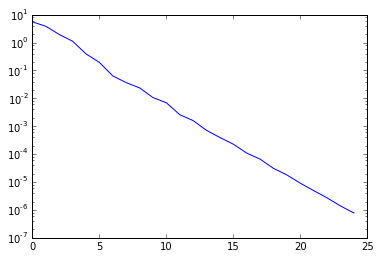

In [11]:
%pylab inline
import pylab
import numpy

A=numpy.array([[10., 2., 3., 5.],[1., 14., 6., 2.],[-1., 4., 16., -4],[5. ,4. ,3. ,11. ]])
b = numpy.array([1., 2., 3., 4.])
print(A.shape[0])

# an initial guess at the solution - here vector of zeros of length the number of rows in A
x = numpy.zeros(A.shape[0]) 

tol = 1.e-6 # iteration tolerance
it_max = 1000 # upper limit on iterations if we don't hit tolerance
residuals=[] # store residuals

for it in range(it_max):
    x_new = numpy.zeros(A.shape[0])  # initialise the new solution vector
    for i in range(A.shape[0]):
        x_new[i] = (1./A[i, i]) * (b[i] - numpy.dot(A[i, :i], x[:i]) - numpy.dot(A[i, i + 1:], x[i + 1:]))

    residual = numpy.linalg.norm(numpy.dot(A, x) - b)  # calculate the norm of the residual r=Ax-b for this latest guess
    residuals.append(residual) # store it for later plotting
    if (residual < tol): # if less than our required tolerance jump out of the iteration and end.
        break

    x = x_new # update old solution

pylab.semilogy(residuals) # plot the log of the residual against iteration number 
print(x_new) # our solution vector
print(numpy.dot(linalg.inv(A),b))  # check against scipy

## Iterative methods - Gauss-Seidel's method

We can make a small improvement to Jacobi's method using the updated components of the solution vector as they become available:

* Starting from a guess at the solution $\pmb{x}^{(0)}$

* iterate for $k>0$
$$x_i^{(k)} = \frac{1}{A_{ii}}\left(b_i- \sum_{\substack{j=1\\ j< i}}^nA_{ij}x_j^{(k)} - \sum_{\substack{j=1\\ j> i}}^nA_{ij}x_j^{(k-1)}\right),\quad  i=1,2,\ldots, n.$$

Note that as opposed to Jacobi, we can overwrite the entries of $\pmb{x}$ as they are updated, with Jacobi we need to store both the new as well as the old iteration.

The Gauss-Seidel algorithm should converge faster than Jacobi, but this convergence can only be *guaranteed* for matrices which are diagonally dominant (for every row, the magnitude of value on the main diagnonal is greater than the sum of the magnitudes of all the other entries in that row), or if the matrix is *symmetric positive definite* (a property we won't define in this course).  



### <span style="color:blue">Exercise 4.3: Implement Gauss-Seidel's method.</span>

Generalise the Jacobi code to solve the matrix problem using Gauss-Seidel's method.

In [61]:
import numpy as np
import scipy.linalg as sl


def gauss_seidel(A, b, maxit=500):
    m, n = A.shape
    x = np.zeros_like(b)
    for k in range(maxit):
        for i in range(m):
            x[i] = 1/A[i,i] * (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,i+1:], x[i+1:]))
    return x


A = numpy.array([[10., 2., 3., 5.],
                 [1., 14., 6., 2.],
                 [-1., 4., 16.,-4],
                 [5. ,4. ,3. ,11.]])
b = numpy.array([1., 2., 3., 4.])
np.allclose(np.dot(sl.inv(A),b), gauss_seidel(A, b))

[-0.16340816 -0.01532706  0.27335264  0.36893555]


True

## Sparse matrices

Note that the matrices which result from the numerical solution of differential equations are generally  *sparse* (<https://en.wikipedia.org/wiki/Sparse_matrix>) which means that most entries are zero (the alternative is termed *dense*).  Knowing which entries are zero means that we can devise more efficient matrix storage methods, as well as more efficient implementations of the above algorithms.

As an example, for the two iterative methods shown above (Jacobi and Gauss Seidel), the cost of each iteration is quadratically dependent on the number of unknowns $n$, since we need to loop through all the entries of the $n\times n$ matrix $A$. For a fixed number of iterations the computational cost of these methods therefore scales as $n^2$. If we know that each row only contains a fixed, small number of non-zero entries however (as for example the matrix in the last exercise), we can simply skip the zero entries and the cost *per iteration* becomes linear in $n$. These scalings of $n^2$ for *dense* and $n$ for *sparse* matrices for the cost per iteration are typical for iterative methods. Unfortunately this does not mean that the overal cost of an iterative method is also $n^2$ or $n$, as the number of iterations that is needed to achieve a certain accuracy quite often also increases for bigger problem sizes. The number of required iterations typically only increases very slowly however, so that the cost of the method is still considerably cheaper than direct methods, in particular for very large problems.

A huge range of iterative solution methods exist and the literature on this topic is massive. Below is an example of using scipy to access the Conjugate Gradient algorithm which is a popular example of a method suitable for matrices which result from the numerical solution of differential equations.

In [2]:
import numpy
import scipy.sparse.linalg

n=50
main_diag = numpy.ones(n)
off_diag = numpy.random.random(n-1)  # to make it a bit more interesting make the off-diagonals random
A = numpy.diag(-2*main_diag,0) + numpy.diag(1.*off_diag,1) + numpy.diag(1.*off_diag,-1)
# A random RHS vector
b = numpy.random.random(A.shape[0])

print A # print our A in "dense" matrix format

sA = scipy.sparse.csr_matrix(A) # The same matrix in a "sparse" matrix data structure where only non-zeros stored
print sA

# now use a scipy iterative algorithm (Conjugate Gradient) to solve

# First define a function which we will pass the the solver in order to store and print the iteration numbers and residuals
def gen_callback_cg():
    diagnostics = dict(it=0, residuals=[]) 
    def callback(xk):   # xk is the solution computed by CG at each iteration
        diagnostics["it"] += 1
        diagnostics["residuals"].append(numpy.linalg.norm(numpy.dot(A, xk) - b))
        print(diagnostics["it"], numpy.linalg.norm(numpy.dot(A, xk) - b))
    return callback    

x_sol = scipy.sparse.linalg.cg(A,b,x0=None, tol=1e-10, maxiter=1000, callback=gen_callback_cg())

[[-2.          0.61882841  0.         ...,  0.          0.          0.        ]
 [ 0.61882841 -2.          0.66655965 ...,  0.          0.          0.        ]
 [ 0.          0.66655965 -2.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ..., -2.          0.22501949  0.        ]
 [ 0.          0.          0.         ...,  0.22501949 -2.          0.86267149]
 [ 0.          0.          0.         ...,  0.          0.86267149 -2.        ]]
  (0, 0)	-2.0
  (0, 1)	0.618828414276
  (1, 0)	0.618828414276
  (1, 1)	-2.0
  (1, 2)	0.666559653751
  (2, 1)	0.666559653751
  (2, 2)	-2.0
  (2, 3)	0.291319892756
  (3, 2)	0.291319892756
  (3, 3)	-2.0
  (3, 4)	0.770110321377
  (4, 3)	0.770110321377
  (4, 4)	-2.0
  (4, 5)	0.0454034205716
  (5, 4)	0.0454034205716
  (5, 5)	-2.0
  (5, 6)	0.140440902887
  (6, 5)	0.140440902887
  (6, 6)	-2.0
  (6, 7)	0.569533654337
  (7, 6)	0.569533654337
  (7, 7)	-2.0
  (7, 8)	0.190283158038
  (8, 7)	0.190283158038
  (8, 8)	-2.0


## Example

Let us consider an electric circuit arranged in a regular grid of $n$ rows and $m$ columns. The nodes in the grid are numbered from 0 to $nm-1$ as indicated in the diagram below.

![bla](images/circuit.png)

We want to calculate the electric potential $V_i$ in all of the nodes $i$. A node $i$ somewhere in the middle of the circuit is connected via resistor to nodes $i-1$ and $i+1$ to the left and right respectively, and to the nodes $i-m$ and $i+m$ in the rows above and below. For simplicity we assume that all resistors have the same resistance value $R$. The first and last node of the circuit (0 and $nm-1$) to a battery via two additional resistors, with the same resistance value $R$.

The sum of the currents coming into a node is zero (if we use a sign convention where a current coming into a node is positive and a current going out is negative. The currents between two nodes can be calculated using Ohm's law: $I=V/R$ where $R$ is the resistance of the resistor, and $V$ is the potential difference between two nodes, say $V=V_i-V_{i-1}$. Therefore we can write:

\begin{eqnarray}
  0 &=& I_{i-1\to i} + I_{i+1\to i} + I_{i-m\to i} + I_{i+m\to i} \\
    &=& V_{i-1\to i}/R + V_{i+1\to i}/R + V_{i-m\to i}/R + V_{i+m\to i}/R \\
    &=& (V_{i}-V_{i-1})/R + (V_{i}-V_{i+1})/R + (V_{i}-V_{i-m})/R + (V_{i}-V_{i+m})/R \\
    &=& (4V_{i}-V_{i-1}-V_{i+1}-V_{i-m}-V_{i+m})/R
\end{eqnarray}

This gives us one linear equation for each node in the circuit (with slight modifications for nodes that are not in the interior). These can be combined into a linear system $Ax=b$ which is assembled in the code below:

In [14]:
n = 4 # number of rows
m = 3 # number of columns
V_battery = 5.0 # voltage on the right of the battery

A = numpy.zeros((n*m, n*m))
for row in range(n):
    for column in range(m):
        i = row*m + column # node number
        if column>0: # left neighbour
            A[i,i-1] += -1.0
            A[i,i] += 1.0
        if column<m-1: # right neighbour
            A[i,i+1] += -1.0
            A[i,i] += 1.0
        if row>0: # neighbour above
            A[i,i-m] += -1.0
            A[i,i] += 1.0
        if row<n-1: # neighbour below
            A[i,i+m] += -1.0
            A[i,i] += 1.0

# connecting node 0 to the battery: I = (V_0 - 0)/R
A[0,0] += 1.0 
# connecting last node nm-1 to the battery: I = (V_0 - V_battery)/R = V_0/R - V_battery/R
A[n*m-1,n*m-1] += 1.0
# the V_battery/R term is a constant that does not depend on the unknowns, so ends up in the rhs vector b
b = numpy.zeros(n*m)
b[n*m-1] = V_battery

### <span style="color:blue">Exercise 4.4: Use Gauss-Seidel's method to solve a set of equations</span>

Generalise the Jacobi code to solve the matrix problem $\pmb{Ax} = \pmb{b}$ using Gauss-Seidel's method, with

$A = \left[\begin{array}{rrr}
4 & -1 & 1\\
-1 & 4 & -2\\
1 & -2 & 4
\end{array}\right]$

and

$b = \left[12 \quad -1 \quad 5\right]^T$.

In [44]:
import numpy
import scipy.linalg as sl

def gauss_seidel(A, b, maxit=20):
    m, n = A.shape
    x = np.zeros_like(b)
    for k in range(maxit):
        for i in range(m):
            x[i] = 1/A[i,i] * (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,i+1:], x[i+1:]))
    return x


A = numpy.array([[4., -1, 1.],
                 [-1., 4., -2.],
                 [1., -2., 4]])
b = numpy.array([12., -1., 5.])
np.allclose(np.dot(sl.inv(A),b), gauss_seidel(A, b))
print gauss_seidel(A,b)

[ 3.  1.  1.]


# Lecture 5: Numerical Differentiation

## Learning objectives:

* Learn about finite difference approximations to derivatives.
* Be able to implement forward and central difference methods.
* Calculate higher-order derivatives.
* Solve simple ODEs using the finite difference method.

## Finite differences -- the forward difference

Finite differences are a class of approximation methods for estimating/computing derivatives of functions.

Approximations to the derivatives of a function can be computed by using weighted sums of function evaluations at a number of points. The elementary definition of the derivative of a function $f$ at a point $x_0$ is given by:

 $$ f'(x_0)=\lim_{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h} $$

We can turn this into an approximation rule for $f'(x)$ by replacing the limit as $h$ approaches $0$ with a small but finite $h$:

 $$ f'(x_0)\approx \frac{f(x_0+h)-f(x)}{h},\qquad h>0 $$

The figure below illustrates this approximation. Because the approximate gradient is calculated using values of $x$ greater than $x_0$, this algorithm is known as the **forward difference method**. In the figure the derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line -- if the second (and/or higher) derivative of the function is large then this approximation might not be very good unless you make $h$ very small.

![Forward difference method for approximating $f'(x_0)$. The derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line.](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/images/forward_diff.png)

## Taylor series to estimate accuracy
We can use a [Taylor series expansion](http://mathworld.wolfram.com/TaylorSeries.html) to estimate the accuracy of the method. Recall that Taylor series in one dimention tells us that we can expand an increment to the evaluation point of a function as follows:

\begin{align*}
f(x_0+h)&=f(x_0)+hf'(x_0)+ \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots\\ & =f(x_0)+hf'(x_0)+O(h^2)
\end{align*}
 
where $O(h^2)$ represents the collection of terms that are second-order in $h$ or higher.

If we rearrange this expression to isolate the gradient term $f'(x_0)$ on the left hand side, we find:

 $$ hf'(x_0)=f(x_0+h)-f(x_0) +O(h^2) $$
 
and therefore, by dividing through by $h$,
 
 $$ f'(x_0)=\frac{f(x_0+h)-f(x_0)}{h}+O(h) $$

As we are left with $O(h)$ at the end, we know that the forward difference method is first-order (i.e. $h^1$) -- as we make the spacing $h$ smaller we expect the error in our derivative to fall linearly.

For general numerical methods we generally strive for something better than this -- if we halve our $h$ (and so are doing twice as much (or more) work potentially) we would like our error to drop super-linearly: i.e. by a factor of 4 (second-order method) or 8 (third-order method) or more.

## <span style="color:blue">Exercise 5.1: Compute first derivative using forward differencing</span>

Use the forward difference scheme to compute an approximation to $f'(2.36)$ from the following data:

$f(2.36) = 0.85866$

$f(2.37) = 0.86289$

You should get an answer of 0.423.

In [5]:
h = 2.37-2.36
df = (0.86289-0.85866)/h
print df

0.423


## Central differencing

In an attempt to derive a more accurate method, we use two Taylor series expansions; one in the positive $x$ direction from $x_0$, and one in the negative direction. Because we hope to achieve better than first order, we include an extra term in the series:

$$ f(x_0+h)=f(x_0)+hf'(x_0)+\frac{h^2}{2}f''(x_0) + O(h^3) $$

$$ f(x_0-h)=f(x_0)-hf'(x_0)+\frac{(-h)^2}{2}f''(x_0) + O((-h)^3) $$

Using the fact that $(-h)^2=h^2$ and the absolute value signs from the definition of $O$, this is equivalent to:

$$ f(x_0+h)=f(x_0)+hf'(x_0)+\frac{h^2}{2}f''(x_0) + O(h^3) $$
  
$$ f(x_0-h)=f(x_0)-hf'(x_0)+\frac{h^2}{2}f''(x_0) + O(h^3) $$
  
Remember that we are looking for an expression for $f'(x_0)$. Noticing the sign change between the derivative terms in the two equations, we subtract the bottom equation from the top equation to give:

$$ f(x_0+h)-f(x_0-h)=2hf'(x_0) + O(h^3) $$

Finally, rearrange to get an expression for $f'(x_0)$:

$$ f'(x_0)=\frac{f(x_0+h)-f(x_0-h)}{2h} + O(h^2) $$

We can see that by taking an interval symmetric about $x_0$, we have created a second-order approximation for the derivative of $f$. This symmetry gives the scheme its name: the central difference method. The figure below illustrates this scheme. The derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line.  

Even without the analysis above it's hopefully clear visually why this should in general give a lower error than the forward difference approach. However the analysis of the two methods does tell us that as we halve $h$ the error should drop by a factor 4 rather than the 2 we get for the first-order forward differencing.

!["Central difference method for approximating $f'(x_0)$. The derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line."](https://raw.githubusercontent.com/ggorman/Numerical-methods-1/master/notebook/images/central_diff.png)

## <span style="color:blue">Exercise 5.2: Compute first derivative using central differencing</span>

Use the data below to compute $f'(0.2)$ using central differencing:

$$f(0.1) = 0.078348$$
$$f(0.2) = 0.138910$$
$$f(0.3) = 0.192916$$

You should get 0.57284

In [4]:
h=0.1
df = (0.192916-0.078348)/(2*h)
print df

0.57284


## <span style="color:blue">Example: Write a function to perform numerical differentiation</span>

As covered above, the formula

$$f^\prime(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$

can be used to find an approximate derivative of a mathematical function $f(x)$ if $h$ is small. 

Write a function *diff*( *f*, *x*, *h*=1E-6) that returns the approximation of the derivative of a mathematical function represented by a Python function f(x).

Apply the above formula to differentiate $f(x) = e^x$ at x = 0, $f(x) = e^{−2x}$ at
x = 0, $f(x) = \cos(x)$ at x = 2$\pi$ , and $f(x) = \ln(x)$ at x = 1. 

Use $h = 0.01$. 

In each case, write out the error, i.e., the difference between the exact derivative and the result of the formula above.

In [1]:
# Write a function for numerical differentiation

from math import exp, cos, log, pi

def diff(f, x, h = 1E-6):
   numerator = f(x + h) - f(x - h)
   derivative = numerator/(2.0*h)
   return derivative
   
h = 0.01 # The step size

x = 0
f = exp
derivative = diff(f, x, h)
print "The approximate derivative of exp(x) at x = 0 is: %f. The error is %f." % (derivative, abs(derivative - 1)) 
# The 'abs' function returns the absolute value.

x = 0
# Here it is not possible to simply pass in the math module's exp function,
# so we need to define our own function instead.
def g(x):
   return exp(-2*x)
f = g
derivative = diff(f, x, h)
print "The approximate derivative of exp(-2*x) at x = 0 is: %f. The error is %f." % (derivative, abs(derivative - (-2.0)))

x = 2*pi
f = cos
derivative = diff(f, x, h)
print "The approximate derivative of cos(x) at x = 2*pi is: %f. The error is %f." % (derivative, abs(derivative - 0))

x = 1
f = log # By default, log(x) is the natural log (i.e. the log to the base 'e')
derivative = diff(f, x, h)
print "The approximate derivative of ln(x) at x = 0 is: %f. The error is %f." % (derivative, abs(derivative - 1))

SyntaxError: invalid syntax (<ipython-input-1-763126f9c60b>, line 15)

## <span style="color:blue">Exercise 5.3: Compute the derivative of $\sin(x)$</span>

Compute 

$$\frac{d(\sin x)}{dx}\qquad\textrm{at}\qquad x = 0.8$$

using (a) forward differencing and (b) central differencing. 

Write some code that evaluates these derivatives for decreasing values of $h$ (start with $h=1.0$ and keep halving) and compare the values against the exact solution.

Plot the convergence of your two methods.

Populating the interactive namespace from numpy and matplotlib
Exact deriviative at sin(0.8) =  0.6967067093471654
Forward differencing                    Central differencing
  0.256492 (error=      0.44)           0.586258 (error=      0.11)
  0.492404 (error=       0.2)           0.668038 (error=     0.029)
  0.600269 (error=     0.096)           0.689472 (error=    0.0072)
  0.650117 (error=     0.047)           0.694894 (error=    0.0018)
  0.673843 (error=     0.023)           0.696253 (error=   0.00045)
  0.685386 (error=     0.011)           0.696593 (error=   0.00011)
  0.691074 (error=    0.0056)           0.696678 (error=   2.8e-05)
  0.693897 (error=    0.0028)             0.6967 (error=   7.1e-06)
  0.695304 (error=    0.0014)           0.696705 (error=   1.8e-06)
  0.696006 (error=    0.0007)           0.696706 (error=   4.4e-07)


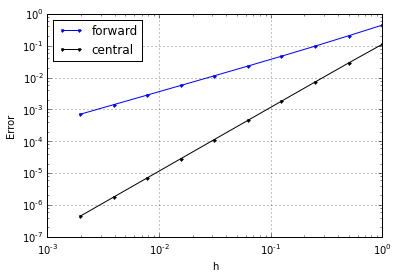

In [27]:
%pylab inline
import math

def forward_diff(f, x, h):
    fx = f(x)
    fxph = f(x+h)
    return (fxph-fx)/h

def central_diff(f, x, h):
    fxph = f(x+h)
    fxnh = f(x-h)
    return (fxph-fxnh)/(2*h)

exact = math.cos(0.8) # for this example we know trivially what the exact solution should be

print "Exact deriviative at sin(0.8) = ", math.cos(0.8)
print "%20s%40s"%("Forward differencing", "Central differencing")

fd_errors = []; cd_errors = []; h_all = [] # we're going to store all the values for plotting
h=1.0 # an initial mesh spacing
for i in range(10):
    fd = forward_diff(math.sin, 0.8, h)
    cd = central_diff(math.sin, 0.8, h)
    print "%10g (error=%10.2g)         %10g (error=%10.2g)"%(fd, abs(fd-exact), cd, abs(cd-exact))
    # store the h and the errors
    h_all.append(h); fd_errors.append(abs(fd-exact)); cd_errors.append(abs(cd-exact))
    h=h/2 # halve h for the next iteration

# as we expect a polynomial relationship between h and the errors,
# a log-log plot will demonstrate this if we get straight lines
# the slopes of these lines indicating the order of the relationship:
# slope 1 for forward diff and slope 2 for central diff
loglog(h_all,fd_errors,'b.-',label='forward') 
loglog(h_all,cd_errors,'k.-',label='central')
xlabel('h');ylabel('Error');grid(True)
pylab.legend(loc='best')

## Calculating second derivatives

Numerical differentiation may be extended to the second derivative by noting that the second derivative is the derivative of the first derivative. That is, if we define a new function $g$ for a second, where:

$$ g(x)=f'(x) $$

then

$$ f''(x)=g'(x) $$

and so we can just apply our differencing formulae twice in order to achieve a second derivative (and so on for even higher  derivatives).

We have noted above that the central difference method, being second-order accurate, is superior to the forward difference method so we will choose to extend that.

In order to calculate $f''(x_0)$ using a central difference method, we first calculate $f'(x)$ for each of two half intervals, one to the left of $x_0$ and one to the right:

$$ f'\left(x_0+\frac{h}{2}\right)\approx\frac{f(x_0+h)-f(x_0)}{h} $$
$$  f'\left(x_0-\frac{h}{2}\right)\approx\frac{f(x_0)-f(x_0-h)}{h} $$

[Of course the things on the RHS are first-order forward and backward differences if we were to consider the LHS at $x_0$.
However, by considering the LHS at $x_0\pm h/2$ they are in this case clearly second-order *central* differences where the denominator of the RHS is $2\times (h/2)$.]

We can now calculate the second derivative using these two values. Note that we know $f'(x)$ at the points $x_0\pm{h}/{2}$, which are only $h$ rather than $2h$ apart. Hence:

$$
\begin{align}
    f''(x_0)&\approx\frac{f'(x_0+\frac{h}{2})-f'(x_0-\frac{h}{2})}{h}\\
    &\approx\frac{\frac{f(x_0+h)-f(x_0)}{h}-\frac{f(x_0)-f(x_0-h)}{h}}{h}\\
    &\approx\frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}
\end{align}$$

## <span style="color:blue">Exercise 5.4: Compute second derivative</span>

Calculate the second derivative $f''$ at $x = 1$ using the data below:

$f(0.84) = 0.431711$

$f(0.92) = 0.398519$

$f(1.00) = 0.367879$

$f(1.08) = 0.339596$

$f(1.16) = 0.313486$

You should get 0.0036828

In [2]:
h = 0.8
ddf = (0.339596 - 2*0.367879 + 0.398519)/(h*h)
print ddf

0.003682812499999996


## Aside: Non-central differencing and differentiation by polynomial fit

In this particular case we were given more data than we actually used. An alternative approach would be to use *non-centred differencing*, e.g. the following is also a valid approximation to the second derivative

$$
\begin{align}
    f''(x_0)\approx\frac{f(x_0+2h)-2f(x_0+h)+f(x_0)}{h^2}
\end{align}$$

This can come in handy if we need to approximate the value of derivatives at or near to a boundary where we don't have data beyond that boundary.

If we wanted to use all of this data, and alternative would be to fit a polynomial to this data, and then differentiate this analytical expression exactly to approximate the derivative at any point between 0.84 and 1.16 (recalling that extrapolation is dangerous).

## Numerical methods for ODEs

One of the most important applications of numerical mathematics in the sciences is the numerical solution of ordinary differential equations (ODEs). This is a vast topic which rapidly becomes somewhat advanced, so we will restrict ourselves here to a very brief introduction to the solution of first order ODEs. A much more comprehensive treatment of this subject is to be found in the Numerical Methods 2 module.

Suppose we have the general first-order ODE:

\begin{align}
x'(t)&=f(x,t) \\
x(t_0)&=x_0
\end{align}

[Notation: For $x=x(t)$, $\frac{dx}{dt}=x'=\dot{x}$.]

That is, the derivative of $x$ with respect to $t$ is some known function of $x$ and $t$, and we also know the initial condition of $x$ at some initial time $t_0$.

If we manage to solve this equation analytically, the solution will be a function $x(t)$ which is defined for every $t>t_0$. In common with all of the numerical methods we have encountered in this module, our objective will be to find an approximate solution to the ODE at a finite set of points. In this case, we will attempt to find approximate solutions at $t=t_0,t_0+h,t_0+2h,t_0+3h,\ldots$.

It is frequently useful to think of the independent variable, $t$, as representing time. A numerical method steps forward in time units of $h$, attempting to calculate $x(t+h)$ in using the previously calculated value $x(t)$. 

### Euler's method

To derive a numerical method, we can first turn once again to the Taylor
series. In this case, we could write:

$$ x(t+h)=x(t)+h x'(t) + O(h^2) $$

Using the definition of our ODE above, we can substitute in for $x'(t)$:

$$ x(t+h)=x(t)+h f(x(t),t)+ O(h^2)$$

Notice that the value of $x$ used in the evaluation of $f$ is that at time $t$. This simple scheme is named **Euler's method** after the 18th century Swiss mathematician, Leonard Euler. 

The fact that the function $f$ in this relation is evaluated at the old time level $t$ means that this is what is known
as an explicit method -- i.e. we have all the information required at time $t$ to explicitly compute the right-hand-side,
and hence easily find the new value for $x(t+h)$. This form of the method is therefore more correctly called either Explicit Euler or Forward Euler.  We could also evaluate the RHS at some time between $t$ and $t+h$ (in the case of $t+h$ this method is called Implicit or Backward Euler) this is more complex to solve for the new $x(t+h)$ but can have advantageous accuracy and stability properties.

The formula given is used to calculate the value of $x$ one time step forward from the last known value. The error is therefore the local truncation error. If we actually wish to know the value at some fixed time $T$ then we will have to calculate $(T-t_0)/h$ steps of the method. This sum over $O(1/h)$ steps results in a global truncation error for Euler's method of $O(h)$. In other words, Euler's method is only first-order accurate -- if we halve $h$ we will need to do double the amount of work and the error should correspondingly halve; if we had a second-order method we would expect the error to reduce by a factor of 4 for every doubling in effort!

To illustrate Euler's method, and convey the fundamental idea of all time stepping methods, we'll use Euler's method to solve one of the simplest of all ODEs:

$$ x'(t)=x $$
$$ x(0)=1 $$

We know, of course, that the solution to this equation is $x=e^t$, but let's ignore that for one moment and evaluate $x(0.1)$ using Euler's method with steps of $0.05$. The first step is:

$$\begin{align}
  x(0.05)&\approx x(0)+0.05x'(0)\\
  &\approx1+.05\times1\\
  &\approx 1.05
\end{align}$$

Now that we know $x(0.05)$, we can calculate the second step:

$$
\begin{align}
  x(0.1)&\approx x(0.05)+0.05x(0.05)\\
  &\approx 1.05+.05\times1.05\\
  &\approx 1.1025
\end{align}$$

Now the actual value of $e^{0.1}$ is around $1.1051$ so we're a couple of percent off even over a very short time interval and only a couple of steps of the algorithm.

## <span style="color:blue">Exercise 5.5: Implementing Forward Euler's method</span>

Write a function *euler*( *f*, *x0*, *t0*, *t_max*, *h*) that takes as arguments the function $f(x,t)$ on the RHS of our ODE,
an initial value for $x$, the start and end time of the integration, and the time step.

Use it to integrate the following ODE problems up to time $t=10$

$$x'(t)=x,\quad x(0)=1$$

and 

$$x'(t)=\cos(t),\quad x(0)=0$$

and plot the results.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


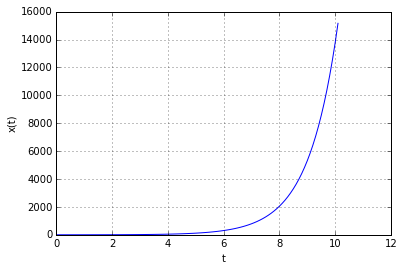

In [75]:
%pylab inline

def euler(f,x0,t0,t_max,h):
    x=x0; t=t0
    # these lists will store all solution values 
    # and associated time levels for later plotting
    x_all=[x0]; t_all=[t0]
    while t<t_max:
        x = x + h*f(x,t)
        x_all.append(x)
        t = t + h
        t_all.append(t)
    return(x_all,t_all)

def f(x,t):
    val = x
    return val

(x_all,t_all) = euler(f,1.0,0.0,10.0,0.1)
plot(t_all, x_all)
xlabel('t');ylabel('x(t)');grid(True)
show()

### Heun's method

Euler's method is first-order accurate because it calculates the derivative using only the information available at the beginning of the time step. As we observed previously, higher-order convergence can be obtained if we also employ information from other points in the interval. Heun's method may be derived by attempting to use derivative information at both the start and the end of the interval:

$$
\begin{align}
  x(t+h)&\approx x(t)+\frac{h}{2}\left(x'(t)+x'(t+h)\right)\\
  &\approx x(t)+\frac{h}{2}\big(f(x,t)+f(x(t+h),t+h)\big)
\end{align}$$

The difficulty with this approach is that we now require $x(t+h)$ in order to calculate the final term in the equation, and that's what we set out to calculate so we don't know it yet! So at this point we have an example of an implicit algorithm and at this stage the above ODE solver would be referred to as the trapezoidal method if we could solve it exactly for $x(t+h)$.

Perhaps the simplest solution to this dilemma, the one adopted in Heun's method, is to use a first guess at $x(t+h)$ calculated using Euler's method:

$$ \tilde{x}(t+h)=x(t)+hf(x,t) $$

This first guess is then used to solve for $x(t+h)$ using:

$$ x(t+h)\approx x(t)+\frac{h}{2}\big(f(x,t)+f(t+h,\tilde{x}(t+h))\big)$$

The generic term for schemes of this type is **predictor-corrector**. The initial calculation of $\tilde{x}(t+h)$ is used to predict the new value of $x$ and then this is used in a more accurate calculation to produce a more correct value. 

Note that Heun's method is $O(h^2)$, i.e. a second-order method.

## <span style="color:blue">Exercise 5.6: Implementing Heun's method</span>

Repeat the previous exercise for this method.

For some ODEs you know the exact solution to compare the errors between Euler's and Heun's method, and how they vary with time step.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


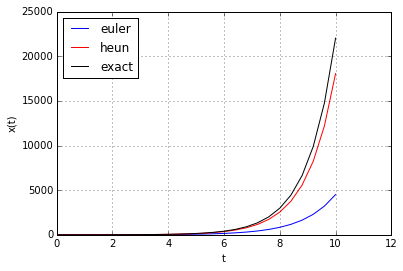

In [76]:
%pylab inline
import math

def euler(f,x0,t0,t_max,h):
    x=x0; t=t0; x_all=[x0]; t_all=[t0];
    while t<t_max:
        x = x + h*f(x,t)
        x_all.append(x)
        t = t + h
        t_all.append(t)
    return(x_all,t_all)

def heun(f,x0,t0,t_max,h):
    x=x0; t=t0; x_all=[x0]; t_all=[t0];
    while t<t_max:
        xe = x + h*f(x,t) # euler guess
        x = x + 0.5*h*(f(x,t) + f(xe,t+h))
        x_all.append(x)
        t = t + h
        t_all.append(t)
    return(x_all,t_all)

def f(x,t):
    val = x
    return val

h = 0.4
x0 = 1.0
t0 = 0.0
tf = 10.0

(x_all,t_all) = euler(f,x0,t0,tf,h)
plot(t_all, x_all,'b',label='euler')
(x_all,t_all) = heun(f,x0,t0,tf,h)
plot(t_all, x_all,'r',label='heun')

plot(t_all, numpy.exp(t_all),'k',label='exact')
xlabel('t');ylabel('x(t)');grid(True);pylab.legend(loc='best')
show()

## Numerical Methods II

Note that you will do a lot more on the numerical solution of ODEs (and also extend to the solution of PDEs) in the Numerical Methods II course.

## <span style="color:blue">Exercise 5.7: The derivative of $\cos(x)$</span>

Compute 

$$\frac{d(\cos x)}{dx}\qquad\textrm{at}\qquad x = 2.5$$

using central differencing. 

Write some code that evaluates the derivative for decreasing values of $h$ (start with $h=1.2$ and keep halving) and compare the values against the exact solution.

Also plot the convergence of your methods.

Populating the interactive namespace from numpy and matplotlib
Exact deriviative at cos(2.5) =  -0.598472144104
Central differencing
 -0.464833 (error=      0.13)
 -0.563205 (error=     0.035)
 -0.589535 (error=    0.0089)
  -0.59623 (error=    0.0022)
 -0.597911 (error=   0.00056)
 -0.598332 (error=   0.00014)
 -0.598437 (error=   3.5e-05)
 -0.598463 (error=   8.8e-06)
  -0.59847 (error=   2.2e-06)
 -0.598472 (error=   5.5e-07)


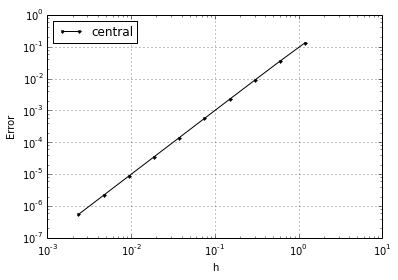

In [54]:
%pylab inline
import math

def central_diff(f, x, h):
    fxph = f(x+h)
    fxnh = f(x-h)
    return (fxph-fxnh)/(2*h)

exact = -math.sin(2.5) # for this example we know trivially what the exact solution should be

print "Exact deriviative at cos(2.5) = ", -math.sin(2.5)
print "%20s"%("Central differencing")

fd_errors = []; cd_errors = []; h_all = [] # we're going to store all the values for plotting
h=1.2 # an initial mesh spacing
for i in range(10):
    cd = central_diff(math.cos, 2.5, h)
    print "%10g (error=%10.2g)"%(cd, abs(cd-exact))
    # store the h and the errors
    h_all.append(h); cd_errors.append(abs(cd-exact))
    h=h/2 # halve h for the next iteration

# as we expect a polynomial relationship between h and the errors,
# a log-log plot will demonstrate this if we get straight lines
# the slopes of these lines indicating the order of the relationship:
loglog(h_all,cd_errors,'k.-',label='central')
xlabel('h');ylabel('Error');grid(True)
pylab.legend(loc='best')

# Lecture 6: Numerical integration

## Learning objectives:

* Be able to compute the integral of a function numerically in 1D
* Implement several simple algorithms
* Understand the concept of order of algorithm and how to improve accuracy


## Performing numerical integration

*Quadrature* is the term used for numerical evaluation of a definite integral, or put more simply, finding the area under a curve. 

If we have a function $f(x)$ defined between $a$ and $b$, the
[integral](http://en.wikipedia.org/wiki/Integral) is defined as 

\begin{equation}
F\left ( x \right ) = \int_{a}^{b} f\left ( x \right )dx
\end{equation}

and its result is the area under the curve. This operation is an essential part of calculus, being the inverse of differentiation. 

Knowing the value of the area under a curve is important to all kinds of applications. However, many expressions are difficult to integrate analytically, or the function which governs their shape is unknown, and we only have data. Therefore, no course on numerical methods is complete without discussing the different methods of numerical integration. 

A fundamental property of a definite integral is that

\begin{equation}
\int_{a}^{b} f\left ( x \right )dx = \int_{a}^{c} f\left ( x \right )dx + \int_{c}^{b} f\left ( x \right )dx
\end{equation}

where $c$ is a point between $a$ and $b$. 

Therefore, we can equally well perform our integration by splitting the function up into a number of smaller intervals and summing the result of each individual integration over the interval.

If the function is complicated or unknown, we can approximate its value within each of these intervals -- we have now performed a numerical *discretisation* of the function and in this case our associated numerical method to compute the integral is terms a *quadrature* or *numerical integration* method.

As with previous lectures, the choice of approximation method, as well as the size of the intervals, will control the error.  Better methods as well as smaller (i.e. more to cover our total interval of interest: $[a,b]$) sub-intervals will lead to lower errors, but will cost more.

Here the following quadrature methods will be covered in the context of a simple function:

* Midpoint rule
* Trapezoid rule
* Simpson's rule
* Composite Simpson's rule
* Weddle's rule.

## Integration example
Let's begin with a simple function to demonstrate the different methods of numerical integration:

\begin{equation}
f\left ( x \right ) = \sin \left ( x \right ),
\end{equation}

and assume that we want to know what the area under the sin function between 0 and $pi$. 

The integral of $\sin \left ( x \right )$ is $-\cos \left ( x \right )$ (plus a constant which drops out as soon as we perform a *definite* integral), so we can integrate it ourselves by hand to find the true area under the curve:

\begin{equation}
F\left ( x \right ) =  \int_{0}^{\pi} \sin \left ( x \right ) = \left [ -\cos\left ( x \right )+ C \right ]_{0}^{\pi} =-\cos\left ( \pi \right ) + \cos\left ( 0 \right ) = 2.
\end{equation}

Let's start by plotting the function between these points.

Populating the interactive namespace from numpy and matplotlib


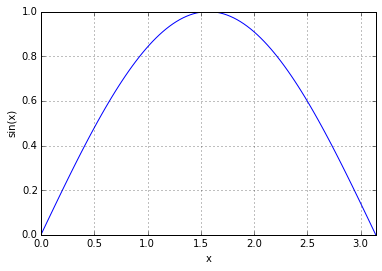

In [3]:
%pylab inline

x = linspace(0,np.pi,100) #Get the value of pi from numpy and generate equally spaced values from 0 to pi
y = sin(x) # calculate sin at these points

plot(x, y)
xlim([0,np.pi]) #Set x axis limits between 0 and pi
xlabel('x');ylabel('sin(x)');grid(True)
show()

Now let's investigate the different quadrature rules, finding the area under the curve and seeing how it differs from the true area which we know is 2.

## Rule 1: Midpoint rule

The *midpoint rule* is the simplest quadrature rule. Note for reasons you will see below it is sometimes also called the *rectangle method*.

Let $h = b - a$ be the length of *one smaller sub-interval* within the larger interval we want to compute the total integral over. 

The midpoint rule, $M$, approximates the integral over this sub-interval by the area of a rectangle, with base of length $h$ and  height of the value of $f(x)$ at the midpoint of that interval (i.e. at $x=(a+b)/2$):

\begin{equation}
M = hf \left ( \frac {a+b} {2} \right )
\end{equation}

Note that is what follows we assume that we have been given the function $f(\cdot)$ such that we can evaluate it anywhere. However, this comes at a cost and so in our quadrature methods we want good accuracy without excessive numbers of function evaluations.

The result of the integration over the entire interval of interest, is then just the sum of the integrals over all the sub-intervals, i.e. the sum of the areas of all the small rectanges. 

A complex example looks like this, where the red line shows the original function we wish to compute the integral of, and the blue rectangles *approximate* the area under that function for a number of sub-intervals:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/340px-Integration_rectangle.svg.png" width="600">

Clearly the sum of the areas of all the rectanges provides an estimate of the true integral.

[Note that the SciPy module features many different integration functions, and you can find thorough documentation for these functions (including methods not covered in this course) [here](http://docs.scipy.org/doc/scipy/reference/integrate.html). This library does not contain a function for the midpoint rule but it is trivial to create our own.]

In [8]:
def midpoint_rule(start_point, end_point, function, number_of_bins=10):
    # First, check how big each bin needs to be. Bin is just another word for rectangle.
    bin_size = float(end_point - start_point)/number_of_bins
    
    # To make sure our midpoint rule function works as expected and doesn't output garbage accidentally,
    # let's assert that there are more than 0 bins, and that the number of bins is a whole number
    assert bin_size > 0
    assert type(number_of_bins) == int
    # By doing this, the function will give an error if either of these are not true,
    # avoiding problems later. This is a neat alternative to a try-except loop.
    # In programming it is always good to know more than one way of doing things!
    
    # Create the variable to contain the sum of all the areas
    running_total = 0.0
    # Find the first midpoint - the centre point of the base of the rectangle
    mid = start_point + (bin_size/2.0)
    
    # Loop to create each rectangle 
    while (mid < end_point):
        # Find the area of the current rectangle and add it to the running total
        running_total += bin_size * function(mid)  # this involves an evaluation of the function at the sub-interval midpoint
        # Move the midpoint up to the next centre of the bin
        mid += bin_size
    
    # Return our running total result
    return running_total

Now let's test the midpoint function. 

In [9]:
print "The exact area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = midpoint_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 3.14159 (error=1.14159)
Area 2 rectangle(s) = 2.22144 (error=0.221441)
Area 10 rectangle(s) = 2.00825 (error=0.00824841)
Area 100 rectangle(s) = 2.00008 (error=8.22491e-05)
Area 1000 rectangle(s) = 2 (error=8.22467e-07)


With one rectangle, we are simply finding the area of a box of shape $\pi \times$ 1 ($\pi$ is the width of the rectangle and $1$ is the value of the function evaluated at the midpoint $\pi/2$), so of course the result is $\pi$. 

As we increase the number of sub-intervals, or rectangles, we split the function up by, we increase the accuracy of our area.

<span style="color:blue">Exercise:  Based on how the error decreases as we increase the number of rectangles (from 10 to 100 to 1000), what can you estimate as the order of accuracy of this method?</span>

The simplicity of this method is its weakness, as rectangles are rarely a good approximation for the shape of a smooth function. 

We want to use as few shapes as possible to approximate our function, because each additional rectangle is one extra time round the loop, which includes its own operations in addition to additional evaluations of the function, hence increases the overall processing time. 

Instead, let's try another shape that follows the profile a little better ...

## Rule 2: Trapezoid rule

If we change the shape of the rectangle for a trapezoid (the top of the shape is now a linear line approximating the shape of the function, rather than the constant used in the midpoint rule), we arrive at the trapezoid, or trapezoidal, rule. 

The trapezoid rule approximates the integral by the area of a trapezoid with base $h$ and the left- and right-hand-sides equal to the vaules of the function at the two end points.  In this case the area of the shape, $T$, approximating the integral over one sub-interval, is given by

\begin{equation}
T = h \left( \frac {f\left ( a\right ) + f \left (b \right )} {2} \right)
\end{equation}

For our pictorial example used above the approximation looks like it should be more accurate than the midpoint rule:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/340px-Integration_trapezoid.svg.png" width="600">

the tops of the shapes (now trapezoids) are approximating the variation of the function with a linear function, rather than a flat (constant) function.  This looks like it should give more accurate results, but see below.

[Note that numpy has a function for the trapezoid rule, <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html">numpy.trapz</a>, but we'll make our own that works in a similar way to our midpoint rule function.]

## <span style="color:blue">Exercise 6.1: Complete the implementation of the trapezoid rule below</span>

In [13]:
def trapezoid_rule(start_point, end_point, function, number_of_bins=10):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    assert bin_size > 0
    assert type(number_of_bins) == int
    
    running_total = 0.0
    
    # Loop to create each trapezoid 
    for i in range(number_of_bins): # note this function takes a slightly different approach to achieve the same thing as above
        # Set the start of this bin
        this_bin_start = start_point + (bin_size * i)
        # Find the area of the current trapezoid and add it to the running total
        running_total += bin_size*float( function(this_bin_start)+function(this_bin_start+bin_size) )/2.0
        
    #Return our running total result
    return running_total

and test the function in a similar way:

In [14]:
print "The exact area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = trapezoid_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 1.92367e-16 (error=2)
Area 2 rectangle(s) = 1.5708 (error=0.429204)
Area 10 rectangle(s) = 1.98352 (error=0.0164765)
Area 100 rectangle(s) = 1.99984 (error=0.000164496)
Area 1000 rectangle(s) = 2 (error=1.64493e-06)


You should have found the following errors:

`The area found by direct integration = 2`

`Area 1 rectangle(s) = 1.92367e-16 (error=2)`

`Area 2 rectangle(s) = 1.5708 (error=0.429204)`

`Area 10 rectangle(s) = 1.98352 (error=0.0164765)`

`Area 100 rectangle(s) = 1.99984 (error=0.000164496)`

`Area 1000 rectangle(s) = 2 (error=1.64493e-06)`

## Error analysis

We can see a few differences compared to the midpoint rule. 

In this particular case of half a sine wave, the trapezoid rule always *under-estimates* the area, whereas the midpoint rule *over-estimates*. The result for finding the integral of $\sin$ with only one triangle is very small, because that trapezoid has almost no height. 

Perhaps most surprisingly, the midpoint rule is more accurate than the trapezoid rule - this is not obvious from the discussions and the images above.

The accuracy of a quadrature rule is predicted by examining its behaviour in practice with *polynomials*. The order of a rule is the degree of the lowest degree polynomial that the rule does *not* integrate exactly. 

If a quadrature rule of order $p$ is used to integrate a smooth function over an interval of size $h$, then Taylor series analysis shows the error is proportional to $h^p$. 

Both the midpoint and trapezoid rules are exact for constant and linear functions, but are not exact for quadratics. Therefore, they have order two (as we saw above in terms of how their errors reduced with smaller $h$). 

<span style="color:blue">Exercise:  It's obvious why this is the case for the trapezoid rule, but why is it the case for the simpler midpoint rule?</span>

For the "concave-down" (half of a sine wave) function we chose above notice that the trapezidal rule will consistently underestimate the area under the curve. While the mid-point rule will have parts of each rectangle above and below the curve, hence to a certain extent the errors will cancel each other out. This is why for this example the errors in the mid-point rule turn out to be approximately half those in the trapezoidal rule.  While this turns out to be *generally* true for smooth functions, we can always come up with (counter) examples where the trapezoid rule will win (can you think of an example?).

Taylor series analysis can be used (like last week for derivative approximation) to formally construct upper bounds on the quadrature error for both methods, but for us it will be sufficient to just consider an example.  We know analytically that

\begin{equation}
\int_{0}^{1} x^{2}dx = \left.\frac{1}{3}x^3\right|_0^1=\frac {1}{3}
\end{equation}

Numerically, the midpoint rule gives

\begin{equation}
M = 1 \left(\frac {1}{2}\right)^{2} = \frac {1}{4}
\end{equation}

while the trapezoid rule gives

\begin{equation}
T = 1 \frac {0+1^{2}}{2} = \frac {1}{2}
\end{equation}

The error for $M$ is 1/12, while the error for $T$ is -1/6. Therefore, the midpoint rule is twice as accurate as the trapezoid rule.  This is the case for this simple example, and we see from the errors numbers printed above that it is approximately true also for the sine case.


### Rule 3: Simpson's rule

Knowing the error estimates from the two rules explored so far allows us to combine them to create a new quadrature rule, more accurate than either one separately. 

Suppose $S$ indicates an unknown, but more accurate, estimate of the integral over an interval.  Then from above as $T$ has an error  approximately -2 times the error in $M$, the following relation must hold approximately:

\begin{equation}
S-T \approx -2 \left ( S-M\right )
\end{equation}

We can solve this for $S$ in order to provide a more accurate estimate of the integral:

\begin{equation}
S = \frac{2}{3}M + \frac{1}{3}T
\end{equation}

This estimate is usually more accurate than either $M$ or $T$ alone. 

The resulting quadrature method is known as [Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule). 

An alternate derivation of the same rule involves fitting a *quadratic function* (rather than the constant and linear already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation.

In both cases you arrive at the rule:

\begin{equation}
S = \frac{h}{6}\left ( f \left ( a\right ) + 4f \left ( c\right ) + f\left ( b\right )\right )
\end{equation}

This expression now integrates up to cubics exactly, so it is of order 4. 

It looks like a much closer fit to the function:

<img src="http://upload.wikimedia.org/wikipedia/commons/5/50/Integration_simpson.png" width="600">

Let's make a function to test it out...

## <span style="color:blue">Exercise 6.2: Implementing Simpson's rule</span>

Complete an implementation of Simpson's rule and test it on our sine function.

In [15]:
def simpsons_rule(start_point, end_point, function, number_of_bins=10):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    assert bin_size > 0
    assert type(number_of_bins) == int
    
    running_total = 0.0
    
    #Loop to create each shape 
    for i in range(number_of_bins):
        #Find a, c, and b
        this_bin_start = start_point + bin_size * (i)
        this_bin_mid = this_bin_start + bin_size/2
        this_bin_end = this_bin_start + bin_size
        #Calculate the rule and add to running total.
        running_total += (bin_size/6)*float(function(this_bin_start)+4*function(this_bin_mid)+function(this_bin_end))
        
    #Return our running total result
    return running_total

In [21]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = simpsons_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 2.0944 (error=0.0943951)
Area 2 rectangle(s) = 2.00456 (error=0.00455975)
Area 20 rectangle(s) = 2 (error=4.23093e-07)
Area 200 rectangle(s) = 2 (error=4.228e-11)
Area 2000 rectangle(s) = 2 (error=2.22045e-15)


For this simple function you should find far smaller errors, and which drop much more rapidly with smaller $h$ (or more sub-intervals).


## Rule 4: Composite Simpson's Rule

Let's take our calculations another step further. 

Previously, we have considered $a$ at the start of the interval, and $b$ at the end, with $c$ at the mid point. 

Instead, let's consider [a,c] and [c,b] as two intervals and split them up into even smaller subintervals, by making $d$ and $e$ the midpoints of these subintervals, where clerly $d = \left ( a+c\right )/2$, and $e = \left( c+b\right )/2$. 

If we apply Simpson's rule to each of the smaller subintervals, we obtain a rule over the larger $\left[a,b\right]$ that now takes the form:
 
\begin{equation}
S_2 = \frac{h}{12}\left ( f \left ( a\right ) + 4f \left ( d\right ) + 2f\left ( c\right ) + 4f \left ( e\right ) + f \left ( b\right )\right )
\end{equation}

This provides the same result as applying the standard Simpson's rule over the two intervals and summing, but notice that we have saved an evaluation of $f(c)$.

This is known as the [Composite Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule#Composite_Simpson.27s_rule), an example of a *composite* quadrature rule as it is a method that subdivides each interval. 

We finally don't need to write our own function, as scipy includes a function for the Composite Simpson's rule, [simps](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html). Since we have written functions above, let's make another one so we know it works in the same way as the others, so we can be sure our results are comparable.

In [10]:
def simpsons_composite_rule(start_point, end_point, function, number_of_bins=10):
    
    bin_size = float(end_point - start_point)/number_of_bins
    
    assert bin_size > 0
    assert type(number_of_bins) == int
    
    running_total = 0.0
    
    #Loop to create each shape 
    for i in range(number_of_bins):
        #Find a, d, c, e, and b
        this_bin_start = start_point + bin_size * (i)
        this_bin_quarter = this_bin_start + bin_size*1./4
        this_bin_mid = this_bin_start + bin_size*2./4
        this_bin_three_quarter = this_bin_start + bin_size*3./4
        this_bin_end = this_bin_start + bin_size
        #Calculate the rule and add to running total. 
        running_total += (bin_size/12)*float(function(this_bin_start)+4*function(this_bin_quarter)
                                             +2*function(this_bin_mid)+4*function(this_bin_three_quarter)
                                             +function(this_bin_end))
        
    #Return our running total result
    return running_total

In [11]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = simpsons_composite_rule(0, np.pi, sin, i)
    print "Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area 1 rectangle(s) = 2.00456 (error=0.00455975)
Area 2 rectangle(s) = 2.00027 (error=0.00026917)
Area 10 rectangle(s) = 2 (error=4.23093e-07)
Area 100 rectangle(s) = 2 (error=4.22791e-11)
Area 1000 rectangle(s) = 2 (error=6.21725e-15)


This is a slight improvement for a simple function like $\sin$, but will be much more of an improvement for functions which oscillate more, in a relative sense comapred to the size of our bins. 

## Rule 5: Weddle's rule

Now we are on our final rule... 

Given that $S$ and $S_2$ approximate the same integral, their difference can be used to estimate the error:

\begin{equation}
E = \left ( S_2 - S \right)
\end{equation}

Therefore, we can combine these rules to make an *even more* accurate approximation. 

Both of the rules are of *order four*, but the $S_2$ interval size is effectively half the $S$ step size, so we would expect $S_2$ to be roughly $2^4=16$ times as accurate. Let's call this super accurate rule $Q$, and we can find it by solving:

\begin{equation}
Q - S = 16 \left ( Q - S_2 \right )
\end{equation}

resulting in:

\begin{equation}
Q = S_2 + \frac {\left (S_2 - S \right )}{15} 
\end{equation}

This is known as Weddle's rule or the extrapolated Simpson's rule, because it uses two different values of $h$ and *extrapolates* towards $h = 0$. 

Making a function of this is easy as we just call our other two Simpson functions.

## <span style="color:blue">Exercise 6.3: Implementing Weddle's rule</span>

Write a function which implements Weddle's rule by the appropriate calls to the simpsons and simpsons_composite functions written above.

In [10]:
def weddles_rule(start_point, end_point, function, number_of_bins=10):
    result_simpson = simpsons_rule(start_point, end_point, function, number_of_bins)
    result_composite = simpsons_composite_rule(start_point, end_point, function, number_of_bins)
    
    return result_composite + float(result_composite - result_simpson)/15

In [18]:
print "The area found by direct integration = 2"
for i in (1, 2, 10, 100, 1000):
    area = weddles_rule(0, np.pi, sin, i)
    print "Area with %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2))

The area found by direct integration = 2
Area with 1 rectangle(s) = 1.99857 (error=0.00142927)
Area with 2 rectangle(s) = 1.99998 (error=1.68691e-05)
Area with 10 rectangle(s) = 2 (error=9.96725e-10)
Area with 100 rectangle(s) = 2 (error=4.44089e-16)
Area with 1000 rectangle(s) = 2 (error=2.22045e-15)


You can see our final rule is much more accurate for fewer required bins. Indeed we are down at the limits where round-off errors are affecting our results.

## Aside: (Richardson) extrapolation, Romberg integration and Newton-Cotes formulae

Note that the above technique of using the same rule, but with different values for $h$, to derive a more accurate estimate of the integral is an example of what is more generally called *Richardson extrapolation*.  

Performing this approach using the trapezoid rule as the starting point leads to what is termed *Romberg integration*.

Taking the idea behind Simpson's rule which fit a quadratic Lagrange interpolating polynomial to *equally spaced* points in the interval, end extending to any order Lagrange polynomial leads to the *Newton-Cotes* family of quadrature rules.

Note finally, that even wider families exist where the function being integrated is evaluated at non-equally-spaced points.

And of course for practical application these ideas need to be extended to more than one dimension.

# Lecture 7: Roots of Equations

## Learning objectives:

* Identify nonlinear equations
* Solve these equations using the `scipy.optimize` functions `bisect` and `newton` 
* Explain the algorithms that underlie the Bisection, Newton and Secant method
* Explain why these methods are considered *iterative* and *approximative* and how this relates to *tolerances*
* Explain three types of *convergence* errors


# Nonlinear Equations

Most systems in earth science are nonlinear in nature, meaning they can't be expressed in simple terms of

\begin{equation}
y = a + kx
\end{equation}

or, explicitly expressed as a function

\begin{equation}
f(x) = a + kx
\end{equation}

where $f(x)$ may be a value of interest as a result of some variable, $x$, which we can quantify through measurements or observations. Rather, realistic systems, when expressed as equations, contain terms like

\begin{equation}
x^2, x^3, \mathrm{tan}(x), \mathrm{sin}(x), \mathrm{ln}(x), \mathrm{erf}(x), \sqrt{x}...
\end{equation}

These terms render the system *nonlinear*, i.e., not linearly dependent on a variable. You should be familiar, for example, with the quadratic form $f(x) = a x^2 + bx + c$, for which there exists the well known analytic formula

\begin{equation}
x^*_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
\end{equation}

where the solutions $x^*_{1,2}$ are commonly referred to as the *roots* of the equation. A popular example in math classes without trivial solution is

\begin{equation}
x = \mathrm{tan}(x)
\end{equation}

which we can solve by guessing $x$, plugging it into the right-hand-side and then evaluate the equation. The resulting new value for $x$ is then used as the next best guess. This procedure is repeated until two conscutive values for x differ by less than some defined error limit. It follows that

\begin{equation}
x_{n+1} = f(x_n)
\end{equation}

and this strategy is often referred to as (Picard's) method of successive approximations. A pseudo pseudo-code description of this solution strategy looks like

```
guess x
x_previous = x+2*tolerance
while abs(x - x_previous) > tolerance do   
    x_previous = x
    x = f(x_previous)
```

## <span style="color:blue">Exercise 7.1: Complete the implementation of the method of successive approximations below to solve $x=\mathrm{e}^{-x}$</span>

In [1]:
import numpy as np

def picard(fct, x, atol=1.0E-4):
    x_prev = x+2*atol
    while abs(x-x_prev) > atol:
        x_prev = x
        x = fct(x_prev)
    return x

def f(x):
    return np.exp(-x)

print picard(f, 0.9) # 0.9 is our initial guess

0.567177365013


Looking at the intermediate results $x_n$ in $x_{n+1} = f(x_n)$ and plotting them alongside $x = \mathrm{e}^{-x}$ we find

x_00 = 0.00000
x_01 = 1.00000
x_02 = 0.36788
x_03 = 0.69220
x_04 = 0.50047
x_05 = 0.60624
x_06 = 0.54540
x_07 = 0.57961
x_08 = 0.56012
x_09 = 0.57114
x_10 = 0.56488
x_11 = 0.56843
x_12 = 0.56641
x_13 = 0.56756
x_14 = 0.56691
x_15 = 0.56728
x_16 = 0.56707
x_17 = 0.56719


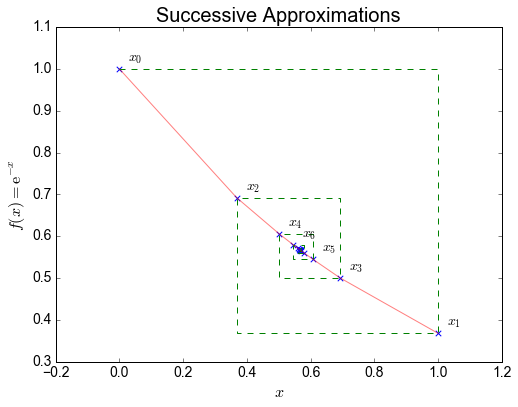

In [2]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import auxilliary_plots  # only for illustrational purposes
def f(x):
    return np.exp(-x)
auxilliary_plots.picard_convergence_pattern(f, 0., flabel=r'$f(x) = \mathrm{e}^{-x}$')

This plot shows that our algorithm *converges* to the point where $x = f(x)$, which in our case is $x = \mathrm{e}^{-x}$, the point along the function where both $x$ and $f(x)$ equal ~0.57. It should be obvious that this method is iterative in nature and that the solution can be expected to be an approximation accurate to $\epsilon \leq$ `tol`. A similar approach is to plot $x$ and $\mathrm{e}^{-x}$ and find the intersection:

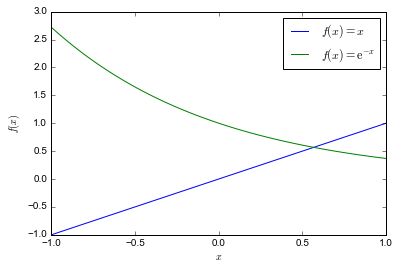

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xspace = np.linspace(-1,1,100)
plt.plot(xspace, xspace, label='$f(x)=x$')
plt.plot(xspace, np.exp(-xspace), label='$f(x)=\mathrm{e}^{-x}$')
plt.legend()
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.show()

It is obvious that this graphical method shows the intersection point, $x = \mathrm{e}^{-x}$, also at ~0.57. This value is a root of the problem, as it satisfies 

\begin{equation}
f(x) = 0 = x - \mathrm{e}^{-x}
\end{equation}

In this expression we rearranged $x = \mathrm{e}^{-x}$ to $0 = x - \mathrm{e}^{-x}$ and defined $f(x) = x - \mathrm{e}^{-x}$. Thus, another solution strategy  is to find a value $x^*$ such that $f(x^*) = 0$, or, in our case, $x^* - \mathrm{e}^{-x^*} = 0$. 

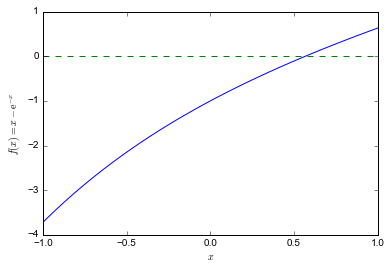

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xspace = np.linspace(-1,1,100)
plt.plot(xspace, xspace-np.exp(-xspace))
plt.plot(xspace, np.zeros_like(xspace), '--')
plt.xlabel('$x$'); plt.ylabel('$f(x) = x - \mathrm{e}^{-x}$')
plt.show()

The graph shows the root of $f(x)$ at our solution $x^* \approx 0.57$. By visual inspection, we see that $f(x)$ has a root $f(x^*) = 0$ in the interval $x^* \in (-1,1)$. 

## <span style="color:blue">Exercise 7.2: By means of visual inspection of $2x + x \mathrm{sin}(x-3) = 5$ in $x \in (-10,10)$, find a subinterval $x \in(a,b)$ such that (1) there exists $x^* \in (a,b)$ such that $f(x^*) = 0$ and (2) $f(x)$ is monotone</span>

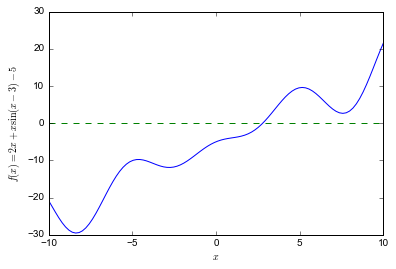

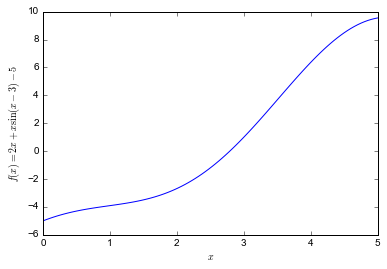

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x + x*np.sin(x-3) - 5

xspace = np.linspace(-10,10,100)
plt.plot(xspace, f(xspace))
plt.plot(xspace, np.zeros_like(xspace), '--')
plt.xlabel('$x$'); plt.ylabel('$f(x) = 2x + x \mathrm{sin}(x-3) - 5$')
plt.show()

xspace = np.linspace(0,5,100)
plt.plot(xspace, f(xspace))
plt.xlabel('$x$'); plt.ylabel('$f(x) = 2x + x \mathrm{sin}(x-3) - 5$')
plt.show()

It seems that between $x \in (0,5)$, e.g., $a$ = 0 and $b$ = 5 and within, there exists a root and the function is monotonically increasing.

# Root Bracketing

By visual inspection we can identify if roots exist for a function, and narrow down the interval in which a root can be found. For the equation $f(x) = x - \mathrm{e}^{-x}$, we have shown by plotting that a root is bounded in $(-1,1)$, and that the $f(x)$ is monitonically increasing in this interval. With this in mind, we can define a root bracketing algorithm that marches along $f(x)$ in increments of $\Delta x$ and identifies a new, closer bracket of the root by detecting a **chang in sign of $f(x)$**. This algorithm is also referred to as incremental search. The approach can be visualized as follows:

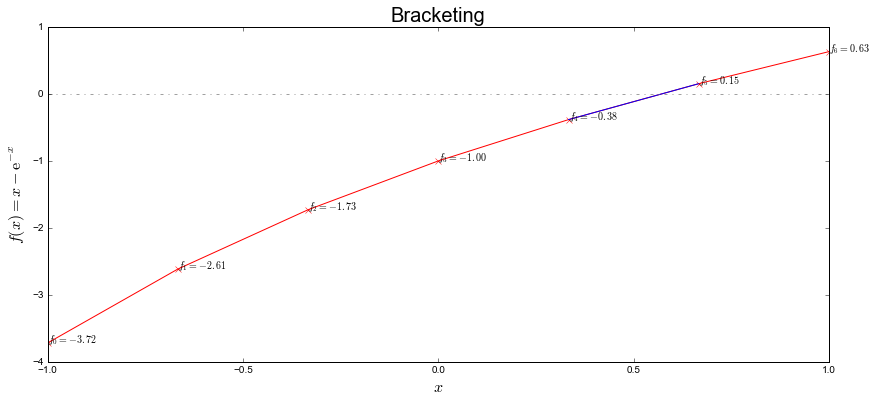

In [6]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import auxilliary_plots
    
def f(x):
    return x - np.exp(-x)

auxilliary_plots.root_bracketing_pattern(f, -1., 1., 0.3, flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

## <span style="color:blue">Exercise 7.3: For $2x + x \mathrm{sin}(x-3) = 5$, use the subinterval $x \in(a,b)$ you found in Exercise 7.2 and complete the code below to implement a root bracketing algorithm. Derive the concept from the Figure above</span>

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x + x*np.sin(x-3) - 5

def root_bracketing(fct, a, b, dx):
    sign = np.sign(fct(a)) #The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0.
    while sign == np.sign(fct(a)):
        a += dx
        if a >= b:
            raise RuntimeError('no root within [a,b]')
    return (a-dx, a)

a, b = 0., 5.
dx = 0.1
print root_bracketing(f, a, b, dx)

(2.700000000000001, 2.800000000000001)


# Bisection Method

Once we know a root can be found in $x \in (a,b)$, we can close in on it with an algorithm similar to incremental search, but with a smart switch to gradually decrease $\Delta x$ by a factor of 1/2, and change the marching direction depending on the sign of $f(x_1)f(x_2)$, where $x_1$ and $x_2$  are local bounds during the marching process.

The algorithm works as follows. If there is a root in the interval $[x_1, x_2]$, then $f(x_1)f(x_2) < 0$. In order to halve the interval, we compute $f(x_3)$, where $x_3 = 1/2
(x_1 + x_2)$ is the midpoint of the interval. If $f(x_2)f(x_3) < 0$, then the root must be in $[x_2, x_3]$, and we record this by replacing the original bound $x_1$ by $x_3$. Otherwise, the root lies in $[x_1, x_3]$, in which case $x_2$ is replaced by $x_3$. In either case, the new interval $[x_1, x_2]$ is half the size of the original interval. The bisection is repeated until the interval has been reduced to some tolerance. A visualization of the method illustrates the narrowing in of an ever-smaller bracket:

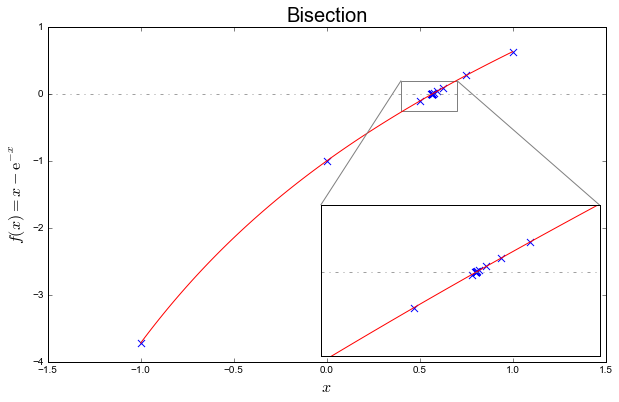

In [8]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import auxilliary_plots 
 
def f(x):
    return x - np.exp(-x)

auxilliary_plots.bisection_pattern(f, -1., 1., flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

This algorithm has been <a href="http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.bisect.html#scipy.optimize.bisect">implemented</a> in the `scipy.optimize` module:

In [9]:
import scipy.optimize as scop

def f(x):
    return x - np.exp(-x)

a, b = -1., 1.
print scop.bisect(f, a, b)

0.56714329041


## <span style="color:blue">Exercise 7.4: For $2x + x \mathrm{sin}(x-3) = 5$, use the subinterval $x \in(a,b)$ you found in Exercise 7.2 and complete the code below to implement a bisection algorithm. Derive the concept from a <a href="https://en.wikipedia.org/wiki/Bisection_method#Algorithm">pseudo-code description</a> and compare the result to `scipy.optimize.bisect`</span>

In [10]:
import numpy as np
import scipy.optimize as scop

def bisection(fct, a, b, atol=1.0E-6, nmax=100):
    n = 0
    while n <= nmax:
        c = (a+b)/2.
        if fct(c) == 0. or (b-a)/2. < atol:
            return c
        n += 1
        if np.sign(fct(c)) == np.sign(fct(a)):
            a = c
        else:
            b = c
    raise RuntimeError('no root found within [a,b]')

def f(x):
    return 2*x + x*np.sin(x-3) - 5

a, b = 0., 5.
print bisection(f, a, b)
print scop.bisect(f, a, b)

2.79035508633
2.79035461807


# Newton Method

So far, above iterative algorithms use only one part of a functions information: its value, $f(x)$. Newton's method additionally uses $f'(x)$ to infer the trend of the function in the vicinity of $x$. This slope, together with the function value $f(x)$, is used to find the intersection of the tangent at $x$ with zero to get an improved guess of the root. The formula can be derived from the Taylor series expansion:

\begin{equation}
f(x_{i+1}) = f(x_i) + f'(x_i)(x_{i+1}-x_i) + O(x_{i+1} - x_i)^2
\end{equation}

Let $f(x_{i+1}) = 0$ to find

\begin{equation}
0 = f(x_i) + f'(x_i)(x_{i+1}-x_i) + O(x_{i+1} - x_i)^2
\end{equation}

assuming $x_{i+1}$ close to $x{i}$ we drop the higher order terms to find

\begin{equation}
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
\end{equation}

which is the **Newton-Raphson formula**.

A pseudo pseudo-code for the algorithm looks like this:

```
guess x[0]
do
    x[i] = x[i-1] - f(x[i-1])/dfdx(x[i-1])
while abs(x[i] - x[i-1]) > tolerance
```

The expression of the associated error indicates quadratic convergence:

\begin{equation}
\epsilon_{i+1} = -\frac{f''(x)}{2f'(x)} \epsilon_{i}^2
\end{equation}



Illustrated, for $f(x) = x - \mathrm{e}^{-x}$, this approximation looks like

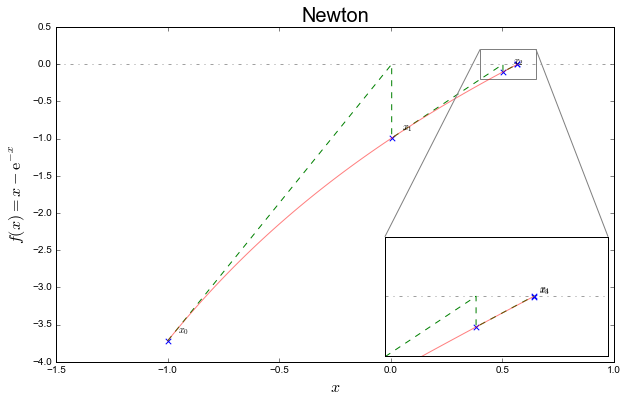

In [11]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import auxilliary_plots 
 
def f(x):
    return x - np.exp(-x)

x0 = -1.
auxilliary_plots.newton_convergence_pattern(f, 1E-2, x0, 1E-3, 2, loc0=4, loc1=2, loc2=1, 
                                            zoom=4, ixmin=0.4, ixmax=0.65, iymin=-0.2, iymax=0.2, 
                                            flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

This algorithm has been <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html">implemented</a> in the `scipy.optimize` module:

In [12]:
import scipy.optimize as scop

def f(x):
    return x - np.exp(-x)

def dfdx(x):
    return 1 + np.exp(-x)

x0 = -1. # initial guess
print scop.newton(f, x0, dfdx)

0.56714329041


## <span style="color:blue">Exercise 7.5: For $2x + x \mathrm{sin}(x-3) = 5$, use $a$ from the subinterval $x \in(a,b)$ you found in Exercise 7.2 as initial guess $x_0$ and complete the code below to implement a Newton algorithm. Compare the result to `scipy.optimize.newton`</span>

In [13]:
import numpy as np
import scipy.optimize as scop

def newton(fct, x0, dfdx, atol=1.0E-6):
    x = [x0]
    while 1:
        x.append(x[-1] - fct(x[-1])/dfdx(x[-1]))
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]

def f(x):
    return 2*x + x*np.sin(x-3) - 5

def dfdx(x):
    return 2 - np.sin(3-x) + x*np.cos(3-x)

x0 = 0. # initial guess
print newton(f, x0, dfdx)
print scop.newton(f, x0, dfdx)

2.79035461807
2.79035461807


The implementation of the Newton method above assumes that the derivative $f^\prime(x)$ is readily available. For many problems, however, the derivative is not easy to express analytically. In these cases $f^\prime(x)$ is replaced by a difference approximation. You learned about numerical differentiation in a previous lecture, in particular

\begin{equation}
f'(x) \approx \frac{f(x+\Delta x) - f(x)}{\Delta x}
\end{equation}

## <span style="color:blue">Exercise 7.6: Extend the Newton algorithm to compute $f^\prime(x)$ using a finite difference approximation. Compare the result to `scipy.optimize.newton`</span>

In [14]:
import numpy as np
import scipy.optimize as scop

def newton(fct, x0, dx=1.0E-7, atol=1.0E-6):
    x = [x0]
    while 1:
        dfdx = (fct(x[-1]+dx)-fct(x[-1]))/(dx)
        x.append(x[-1] - fct(x[-1])/dfdx)
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]

def f(x):
    return 2*x + x*np.sin(x-3) - 5

x0 = 0.
print newton(f, x0)
print scop.newton(f, x0)

2.79035461807
2.79035461807


# Secant Method

The Secant method replaces the local derivative in the Newton method by a difference approximation based on two consecutive $x_n$. It follows that

\begin{equation}
f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}
\end{equation}

which leads to the secant method

\begin{equation}
x_{n+1} = x_n - f(x_n) \left ( \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} \right )
\end{equation}

The algorithm can be visualized as follows:

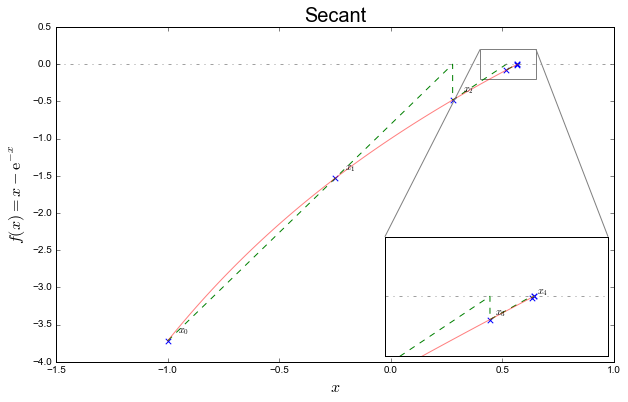

In [15]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import auxilliary_plots 
 
def f(x):
    return x - np.exp(-x)

x0 = -1.
x1 = x0+0.75
auxilliary_plots.secant_convergence_pattern(f, x0, x1, 1E-3, 2, loc0=4, loc1=2, loc2=1, 
                                            zoom=4, ixmin=0.4, ixmax=0.65, iymin=-0.2, iymax=0.2, 
                                            flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

## <span style="color:blue">Exercise 7.6: For $2x + x \mathrm{sin}(x-3) = 5$, use $a$ from the subinterval $x \in(a,b)$ you found in Exercise 7.2 to find $x_0 = a$ and $x_1 = a+0.1$ and complete the code below to implement a Secant algorithm. Compare the result to `scipy.optimize.newton`</span>

In [16]:
import numpy as np
import scipy.optimize as scop

def secant(fct, x0, x1, atol=1.0E-6):
    x = [x0,x1]
    while 1:
        x.append(x[-1] - fct(x[-1])*((x[-1]-x[-2])/(fct(x[-1])-fct(x[-2]))))
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]

def f(x):
    return 2*x + x*np.sin(x-3) - 5

x0 = 0.
x1 = x0+0.1
print secant(f, x0, x1)
print scop.newton(f, x0)

2.79035461807
2.79035461807


# Convergence Issues

Let's first reillustrate the basic concept of Newton root-finding methods for a well behaved function

\begin{equation}
f(x) = x^4 - 5
\end{equation}

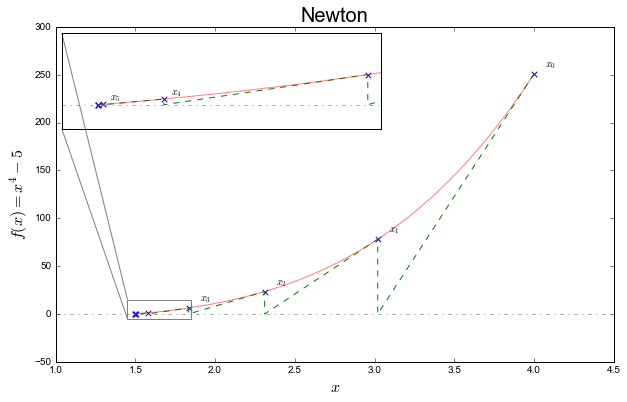

In [17]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import auxilliary_plots 
 
def f(x):
    return x**4 - 5

x0 = 4.0
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 3, loc0=2, loc1=3, loc2=2, zoom=5, 
                                            ixmin=1.45, ixmax=1.85, iymin=-5, iymax=15, flabel=r'$f(x) = x^4 - 5$')

You should intuitively understand by now that the convergence of the Root Bracketing and Bisection methods depends on the initial values provided to the algorithm. Complex equations, or systems thereof, provide plenty situations that prevent convergence all together or cause convergence to an undesired root. Their solution strongly depends on a *good* initial guess. For example,

\begin{equation}
f(x) = x \mathrm{sin}(\pi x)-\mathrm{e}^{-x}
\end{equation}

provides for ample pitfalls, in particular for gradient based (Newton, Secant) methods. We will illustrate these convergence issues below. They mostly fall in one of thee categories

* Multiple roots in the vicinity - the algorithm converges to one of them depending on slight changes in the initial guess
* Nearly singular/numerical overflow - the local gradient at guess $x_n$ is near zero, so that $x_{n+1}$, the intersection of the local gradient approximation with $f(x) = 0$, is beyond the representable range
* Oscillations - the algorithm bounces back and forth between identical $x_n$

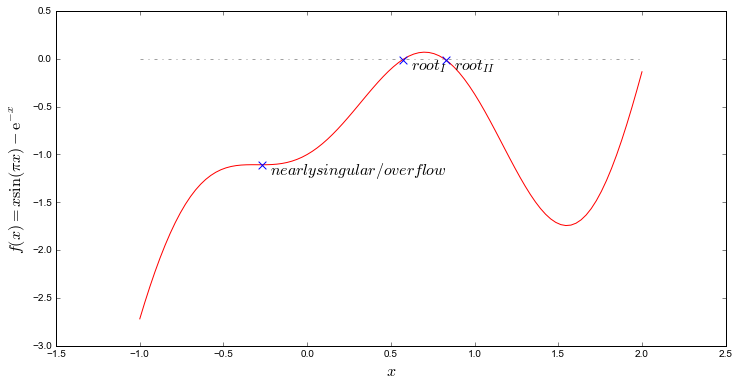

In [18]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)

x = np.linspace(-1, 2, 100)
y = f(x)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, y, color='r',zorder=0)
xs = [0.57, 0.83, -0.27]
texts = ['$root_I$', '$root_{II}$', '$nearly singular/overflow$']
for i in range(len(xs)):
    ax.scatter([xs[i]], [f(xs[i])],marker='x',s=60)
    ax.text(xs[i]+0.05, f(xs[i])-0.1, texts[i], fontsize=16)
ax.plot(x,np.zeros_like(x),color='gray',ls='-.',alpha=0.75)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$', fontsize=16)
plt.show()

## Multiple Roots

For many functions, multiple roots exist and the algorithm depends on the initial value (here 0.0 and 0.1), as it converges to different roots

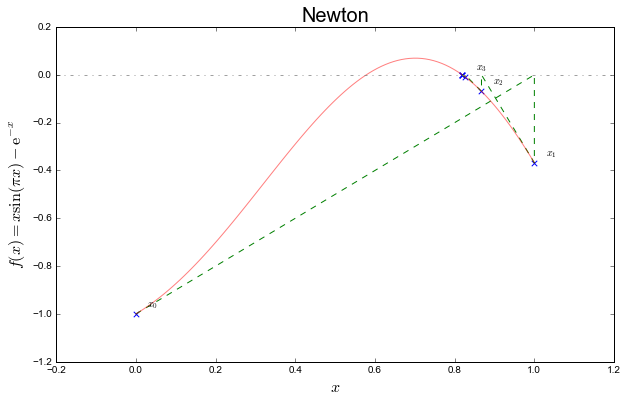

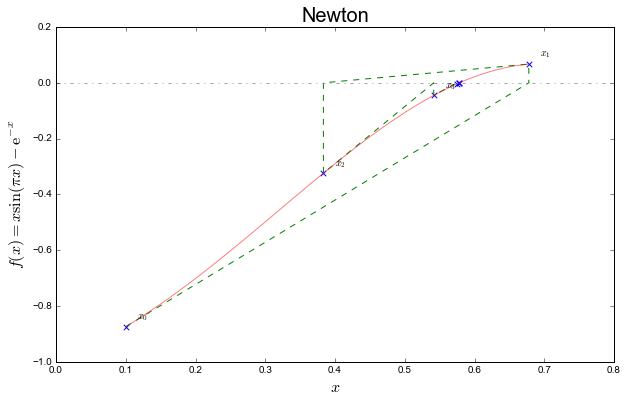

In [19]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import auxilliary_plots 
 
def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)

x0 = 0.0
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 3, inset=False, 
                                            flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')
x0 = 0.1
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 3, inset=False, 
                                            flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')

## Nearly Singular/Numerical Overflow

The gradient $f'(x_n)$ is close to $0$, so that the $x_{n+1}$ is orders of magnitude offset, perhaps too big even to be representable (overflow). 

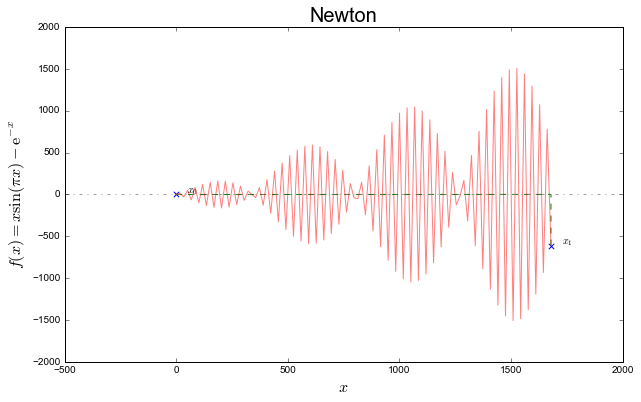

In [20]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import auxilliary_plots 
 
def f(x):
    return x*np.sin(np.pi*x)-np.exp(-x)

x0 = -0.268
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 3, inset=False, maxiter=1, resfct=100, 
                                            flabel='$f(x)= x \mathrm{sin}(\pi x) - \mathrm{e}^{-x}$')

## Oscillation

The iterations are trapped in a region with gradients of equal magnitude but opposite directions.

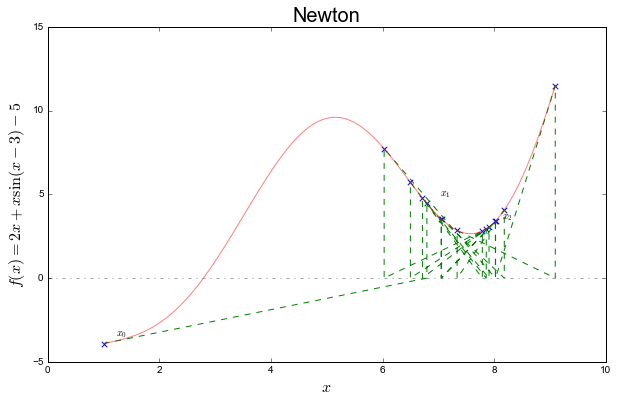

In [21]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import auxilliary_plots 
 
def f(x):
    return 2*x + x*np.sin(x-3) - 5

x0 = 1.
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 2, inset=False, maxiter=14, 
                                            flabel='$f(x)= 2x + x\mathrm{sin}(x-3) - 5$')

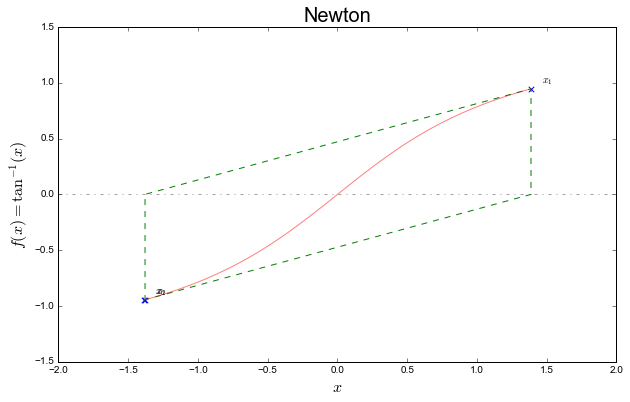

In [22]:
# THIS CELL IS FOR ILLUSTRATIONAL PURPOSES ONLY
%matplotlib inline
import auxilliary_plots 
 
def f(x):
    return np.arctan(x)

x0 = -1.39
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 2, inset=False, maxiter=2, 
                                            flabel='$f(x)= \mathrm{tan}^{-1}(x)$')

# Challenge of the day

### <span style="color:blue">Exercise 7.7: Copy-paste the Picard, Bisection, Newton (with analytical and numerical differentiation) and Secant algorithms and add print statements to find how many *function evaluations* each algorithm takes to reach a solution, given equal tolerances. Use any of the two equations used in this session.</span>

In [23]:
import numpy as np

def picard(fct, x, atol=1.0E-4):
    fevals = 0
    x_prev = x+2*atol
    while abs(x-x_prev) > atol:
        x_prev = x
        x = fct(x_prev) # one evaluation
        fevals += 1 
    print 'Picard used', fevals, 'evaluations'
    return x

def bisection(fct, a, b, atol=1.0E-4, nmax=100):
    n = 0
    fevals = 0
    while n <= nmax:
        c = (a+b)/2.
        if fct(c) == 0. or (b-a)/2. < atol: # one evaluation
            fevals += 1
            print 'Bisection used', fevals, 'evaluations'
            return c
        n += 1
        if np.sign(fct(c)) == np.sign(fct(a)): # two evaluations
            a = c
        else:
            b = c
        fevals += 2
    raise RuntimeError('no root found within [a,b]')
    
def newton_andif(fct, x0, dfdx, atol=1.0E-4):
    x = [x0]
    fevals = 0
    while 1:
        x.append(x[-1] - fct(x[-1])/dfdx(x[-1])) # two function evaluations
        fevals += 2
        if abs(x[-1]-x[-2]) < atol:
            print 'Newton (an dif) used', fevals, 'evaluations'
            return x[-1]
    
def newton_numdif(fct, x0, dx=1.0E-6, atol=1.0E-4):
    x = [x0]
    fevals = 0
    while 1:
        dfdx = (fct(x[-1]+dx)-fct(x[-1]))/(dx) # two evaluations
        x.append(x[-1] - fct(x[-1])/dfdx) #  one evaluation
        fevals += 3
        if abs(x[-1]-x[-2]) < atol:
            print 'Newton (num dif) used', fevals, 'evaluations'
            return x[-1]
        
def secant(fct, x0, x1, atol=1.0E-4):
    x = [x0,x1]
    fevals = 0
    while 1:
        x.append(x[-1] - fct(x[-1])*((x[-1]-x[-2])/(fct(x[-1])-fct(x[-2])))) # three evaluations
        fevals += 3
        if abs(x[-1]-x[-2]) < atol:
            print 'Secant used', fevals, 'evaluations'
            return x[-1]

def fp(x):
    return np.exp(-x)

def f(x):
    return x - np.exp(-x)

def dfdx(x):
    return 1 + np.exp(-x)

print picard(fp, -1.)
print bisection(f, -1., 1.)
print newton_andif(f, -1., dfdx)
print newton_numdif(f, -1.)
print secant(f, -1., -0.8)

Picard used 20 evaluations
0.567122140095
Bisection used 29 evaluations
0.567199707031
Newton (an dif) used 10 evaluations
0.56714329041
Newton (num dif) used 15 evaluations
0.56714329041
Secant used 18 evaluations
0.567143290332


## <span style="color:blue">Exercise 7.8: Compute the root of a function in a specific range for $x$.</span>

Using both, the Bisection method and the Newton method (with a finite difference approximation to compute $f'(x)$) compute the root of the function

$f(x) = \dfrac{1}{(x − 0.3)^2 + 0.01} - \dfrac{1}{(x − 0.8)^2 + 0.04}$.

Note: You can plot plot the function first to obtain an approximate location of the root.

Bisection used 25 evaluations
0.580017089844
Newton (num dif) used 12 evaluations
0.579999983636


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


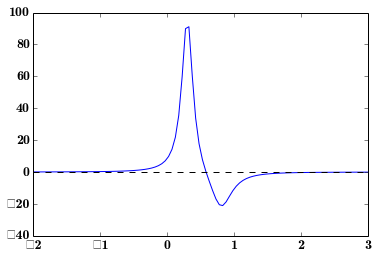

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


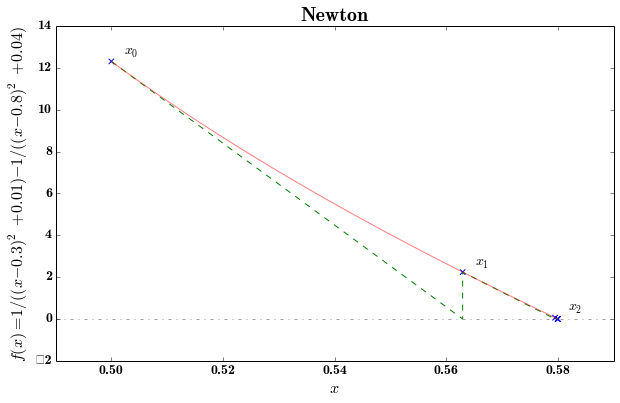

In [55]:
%matplotlib inline
import numpy as np
import pylab
import auxilliary_plots 

def bisection(fct, a, b, atol=1.0E-4, nmax=100):
    n = 0
    fevals = 0
    while n <= nmax:
        c = (a+b)/2.
        if fct(c) == 0. or (b-a)/2. < atol: # one evaluation
            fevals += 1
            print 'Bisection used', fevals, 'evaluations'
            return c
        n += 1
        if np.sign(fct(c)) == np.sign(fct(a)): # two evaluations
            a = c
        else:
            b = c
        fevals += 2
    raise RuntimeError('no root found within [a,b]')

def newton_numdif(fct, x0, dx=1.0E-2, atol=1.0E-4):
    x = [x0]
    fevals = 0
    while 1:
        dfdx = (fct(x[-1]+dx)-fct(x[-1]))/(dx) # two evaluations
        x.append(x[-1] - fct(x[-1])/dfdx) #  one evaluation
        fevals += 3
        if abs(x[-1]-x[-2]) < atol:
            print 'Newton (num dif) used', fevals, 'evaluations'
            return x[-1]

def f(x):
    return 1./((x-0.3)**2+0.01) - 1./((x-0.8)**2+0.04)

x0=0.5
print bisection(f, x0, 2*x0)
print newton_numdif(f, x0)

xx = np.linspace(-2,3,100)
pylab.plot(xx,f(xx))
pylab.plot(xx,np.linspace(0,0,100),'k--')
pylab.show()
auxilliary_plots.newton_convergence_pattern(f, 1E-8, x0, 1E-7, 2, inset=False, maxiter=6, 
                                            flabel='$f(x)= 1/((x-0.3)^2+0.01) - 1/((x-0.8)^2 + 0.04)$')
